<h1 style="font-family: Arial; font-weight: 900; color: magenta; text-align: center;">CLASSIFICATION AND LINEAR REGRESSION<br>WITH SCIKIT-LEARN</h1><br>

<br/><div style="font-family: Arial; color: darkblue; font-size: 14px; font-weight: 600"><a id="toc"></a>
In this part 3:
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[1. The perceptron with scikit-learn](#1)</p>
        <p style="margin: 0 0 0 4rem">[1a. Multi-labels classification with OvA](#1a)</p>
        <p style="margin: 0 0 0 4rem">[1b. Training the perceptron with scikit-learn](#1b)</p>
        <p style="margin: 0 0 0 4rem">[1c. Presenting the perceptron's results with Matplotlib](#1c)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[2. The logistic regression](#2)</p>
        <p style="margin: 0 0 0 4rem">[2a. The logistic sigmoid function](#2a)</p>
        <p style="margin: 0 0 0 4rem">[2b. The logistic regression strategy](#2b)</p>
        <p style="margin: 0 0 0 4rem">[2c. The logistic loss function](#2c)</p>
        <p style="margin: 0 0 0 4rem">[2d. The Hessian of the logistic loss function](#2d)</p>
        <p style="margin: 0 0 0 4rem">[2e. Logistic regression with the Batch Gradient Descent](#2e)</p>
        <p style="margin: 0 0 0 4rem">[2f. Logistic regression with scikit-learn](#2f)</p>
        <p style="margin: 0 0 0 4rem">[2g. Overfitting and regularized linear models](#2g)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[3. Support vector machines](#3)</p>
        <p style="margin: 0 0 0 4rem">[3a. Linear SVM Classification. The hard margin case](#3a)</p>
        <p style="margin: 0 0 0 4rem">[3b. Linear SVM Classification. The soft margin case](#3b)</p>
        <p style="margin: 0 0 0 4rem">[3c. Examples of soft margin linear classification (hyperplane and polynomial decision boundaries)](#3c)</p>
        <p style="margin: 0 0 0 4rem">[3d. Positive definite kernels and RKHS](#3d)</p>
        <p style="margin: 0 0 0 4rem">[3e. Solving nonlinear problems using a kernel SVM](#3e)</p>
        <p style="margin: 0 0 0 4rem; font-size: 14">[3f. Examples of nonlinear kernel SVM](#3f)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[4. Decision trees and random forests](#4)</p>
        <p style="margin: 0 0 0 4rem">[4a. What is a decision tree ?](#4a)</p>
        <p style="margin: 0 0 0 4rem">[4b. Building a decision tree](#4b)</p>
        <p style="margin: 0 0 0 4rem">[4c. Example of a decision tree](#4c)</p>
        <p style="margin: 0 0 0 4rem">[4d. Random forests](#4d)</p><br/>
    <p style="margin: 0 0 0 2rem; font-size: 16px; font-weight: 800">[Appendix - k-nearest neighbors](#Appendix)</p></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# The datasets we will use
from sklearn.datasets import load_iris
from sklearn.datasets import make_moons

# Beautify the code results by using colors
from colorama import Fore, Back, Style
# Define some strings for cleaner codes
BB = Fore.BLUE + Style.BRIGHT
MB = Fore.MAGENTA + Style.BRIGHT

# Beautify figures by rendering them in SVG quality instead of JPG
# (don't use this if you prefer lightweight notebooks)
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats("svg")
# we'll use the "cyberpunk" color map
cmap = plt.get_cmap("cool")

<a id="1"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>1. THE PERCEPTRON WITH SCIKIT-LEARN</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1a. Multi-labels classification with OvA</font><a id="1a"></a></p>$\quad$
        "<font color='darkpink'>OvA</font>", the "<font color='darkpink'>One versus All</font>" method, which is sometimes also called "<font color='darkpink'>One versus the Rest</font>" ("<font color='darkpink'>OvR</font>"), is a technique that allows us to extend any binary classifier to multi-class problems. The idea is to train one classifier per class, where the particular class is treated as the positive class (class $1$) and the examples from all other classes are considered of the negative class (class $0$). So if we have $n$ classes we will train $n$ binary classifiers. Now, if we were to classify a new, unlabeled data instance, we would assign to it the class label with the highest confidence. In the case of the perceptron, we would choose the class label that is associated with the largest net input value (defined in part 2, "1a. Presentation").<br>$\quad$
        In this chapter we will use OvA with the perceptron in order to classify between the $3$ classes of the Iris dataset.

<br><br><div style="font-family: Arial; font-size:14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1b. Training the perceptron with scikit-learn</font><a id="1b"></a></p>$\quad$
        The <font color='green'>scikit-learn</font> library offers not only a large variety of learning algorithms, but also many convenient functions to preprocess data and to fine-tune and evaluate our models. In this chapter we will focus on the learning algorithms.<br>$\quad$
    To get started with the <font color='green'>scikit-learn</font> library, we will train a perceptron model similar to the one that we implemented in part 2. For simplicity, we will use the already familiar Iris dataset throughout the following sections. Conveniently, the Iris dataset is already available via <font color='green'>scikit-learn</font>. Similar to the previous chapter, we will only use two features from the Iris dataset for visualization purposes, but this time we will keep the petal length and the petal width, instead of the petal and sepal lengths :

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print(BB + "Class labels :" + MB, np.unique(y))

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=1, stratify=y)
print(BB + "Labels counts in y :" + MB, np.bincount(y))
print(BB + "Labels counts in y_train :" + MB, np.bincount(y_train))
print(BB + "Labels counts in y_test :" + MB, np.bincount(y_test))

Class labels : [0 1 2]
Labels counts in y : [50 50 50]
Labels counts in y_train : [35 35 35]
Labels counts in y_test : [15 15 15]


<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As we can infer, the Iris flower class names, Iris-setosa, Iris-versicolor and Iris-virginica, are already stored as integers ($0$, $1$ and $2$ respectively).<br>$\quad$
        Moreover, to evaluate how well a trained model performs on unseen data, we have further split the dataset into separate training and test datasets. Using the '<font color='green'>train_test_split</font>' function from <font color='green'>scikit-learn</font>’s "<font color='green'>model_selection</font>" module, we randomly split the X and y arrays into $30\%$ test data ($45$ examples) and $70\%$ training data ($105$ examples). Obviously, the 'train_test_split' function always shuffles the training dataset internally before splitting; otherwise, here all examples from class 0 and class 1 would have ended up in the training datasets, and the test dataset would consist of 45 examples from class 2 ; thus specifying a fixed random seed (with '<font color='green'>random_state=1</font>') simply ensures reproducibility. At last, '<font color='green'>stratify = y</font>' ensures that the training and the test subsets have the same proportions of class labels as the input dataset.</div>

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The first thing to do before training a model is to prepare the data. Here, we merely standardize the features so that no feature has particular importance in the computation of the cost (see part 2, "3d. Standardization").<br/>$\quad$
        We standardize the features, using the "<font color='green'>StandardScaler</font>" class from <font color='green'>scikit-learn</font>’s "<font color='green'>preprocessing</font>" module. We initialize a new '<font color='green'>StandardScaler</font>' object that we assign to the 'sc' variable. Then we fit 'sc' to the training dataset 'X_train', so that it computes and stores the mean and standard deviation of each feature of 'X_train'. Now we can standardize the training matrix, and we call 'X_train_std' the standardized matrix. We will train our linear model (here the perceptron) on the 'X_train_std' matrix, and obtain the weights associated to it; so if we want to predict the classes of new observations we will first need to transform them using the same affine transformation 'sc.transform'; in particular to test our model we will first transform 'X_test' using 'sc.transform'; we call 'X_test_std' the resulting matrix :

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Having prepared the training data, we can now train a perceptron model. Most algorithms in <font color='green'>scikit-learn</font> natively support multiclass classification via the one-versus-all (OvA) method, which allows us to feed the three flower classes to the perceptron all at once. The code is as follows, where 'eta0' is the learning rate and we used the 'random_state' parameter to ensure the reproducibility of the initial shuffling of the training dataset after each epoch :

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Having trained our perceptron, we can make predictions via the '<font color='green'>predict</font>' method; note that '<font color='green'>%d</font>' is a placeholder for an integer, and the value to be inserted is provided after the '<font color='green'>%</font>' operator which follows, so here it will be the total number of instances whose labels are not equal to what our perceptron predicted.

In [5]:
y_pred = ppn.predict(X_test_std)
print(BB + "Misclassified examples : " + MB + "%d" % (y_test != y_pred).sum())

Misclassified examples : 1


<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We see that only $1$ instance was misclassified. We say that the <font color='darkpink'>misclassification error</font> is $\frac{1}{45}$ or approximately $2.2\%$. Or, equivalently, that our model has a <font color='darkpink'>training accuracy</font> of $\frac{44}{45}$ or approximately $97.8\%$.<br>$\quad$
        There are two ways to obtain the <font color='darkpink'>test accuracy</font> of our perceptron using <font color='green'>scikit-learn</font>; either using the '<font color='green'>accuracy_score</font>' of the "<font color='green'>metrics</font>" module to compare the test labels with our predictions relative to the test matrix, or directly from the test matrix, using the perceptron's '<font color='green'>score</font>' method.<br>$\quad$
        Note that '<font color='green'>%.3f</font>' is a placeholder for a float with $3$ digits after the decimal point, obtained by rounding the value provided after the '<font color='green'>%</font>' operator which follows :

In [6]:
from sklearn.metrics import accuracy_score
print(BB + "Accuracy : " + MB + "%.3f" % accuracy_score(y_test, y_pred))

Accuracy : 0.978


In [7]:
print(BB + "Accuracy : " + MB + "%.3f" % ppn.score(X_test_std, y_test))

Accuracy : 0.978


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>1c. Presenting the perceptron's results with Matplotlib</font><a id="1c"></a></p></div>

In [8]:
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx=None):
    # 'np.unique' collects the different values in an array and display them only once, in an 
    # ascending order :
    num_classes = len(np.unique(y))
    # all notations below are mine
    markers = ('o', 's', '^', 'v', '>')
    # instead of the colors in the book, which are colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # I will use the "cool" cmap, because these colors are nicer and we can distinguish them better
    cmap = plt.get_cmap("cool")
    colors = [cmap(i / (num_classes - 1)) for i in range(num_classes)]
    cmap = ListedColormap(colors[:num_classes])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # 'np.arange(x1_min, x1_max, resolution)' generates a 1-dimensional array with values ranging from
    # x1_min to x1_max with a step size of 'resolution'. Here this represents the set of coordinates
    # along the first dimension.
    # 'np.arange(x2_min, x2_max, resolution)' does the same for the second dimension
    # at last, if x and y are 1d arrays of dim m and n resp. then 'np.meshgrid' returns two 2d arrays
    # of dimensions n*m : the first is composed of n rows of x, and the second is composed of m 
    # columns of y
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    # the 'ravel()' method flattens any 2d array into a 1d array by writing its rows one after the 
    # other from top to bottom so 'np.array([xx1.ravel(), xx2.ravel()]).T' is a 2d array of
    # dim mn*2 whose m first rows are the coordinates of all the points of ordinate x2_min with their
    # abscissae in ascending order, the following m rows are the coordinates of all the points of
    # ordinate x2_min + resolution with their abscissae in ascending order, etc.
    # so 'lab' is a 1d array of dim mn; its first m elements are the predictions for the m points of
    # ordinate x2_min, the m following elements are the predictions for the m points of ordinate
    # x2_min + resolution, etc.
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # now 'lab' is the n*m array of predictions for the coordinates of the points in the grid; the
    # second row (from the top) of 'lab' corresponds to the predictions for the second row (from the
    # top as well) of the grid because on a computer screen ascending ordinates go from top to bottom
    lab = lab.reshape(xx1.shape)
    # 'plt.contourf(X, Y, Z, cmap=None, alpha=None)' has many other optional parameters. It traces a
    # contour based on a grid whose coordinates are referenced by 'X' and 'Y' (here 'xx1' and 'xx2')
    # such that to each point on the grid is associated a value given by 'Z'; according to its value
    # each point is given a color defined by the colormap 'cmap' earlier defined and a transparency
    # 'alpha'. Note that 'plt.contourf' does colorize the entire grid, not only a contour ( the "f"
    # in "contourf" means "filled")
    plt.contourf(xx1, xx2, lab, cmap=cmap, alpha=0.8)
    # I add a contour, so the decision boundaries between regions appear more clearly
    plt.contour(xx1, xx2, lab, levels=np.arange(-0.5, num_classes-0.5, 1), colors="darkblue")
    # sets the x-axis limits of the plot to span from the minimum value of the array xx1 to the
    # maximum value of xx1. 
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # 'np.unique(y)' is defined above; 'enumerate' iterates over the array and returns the pairs
    # index/value
    for idx, cl in enumerate(np.unique(y)):
        #* X[y == cl, 0] is the first column of the sub-array of 'X' composed of the rows
        # corresponding to the class 'cl'
        #* x=X[y == cl, 0], y=X[y == cl, 1] are the 'x' and 'y' coordinates of the points to be
        # plotted
        #* c=colors[idx] : each point should receive the color corresponding to its index 'idx'
        #* marker=markers[idx] : each point should receive the marker style registered at
        # 'markers[idx]'
        #* label=f'Class {cl}' defines a label for all the points corresponding to the current class
        # 'cl'; it will be used in the legend of the plot.
        #* edgecolor='black' : the color of the markers' edges will be black
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], color=colors[idx], alpha=0.6, marker=markers[idx],
                    label=f'Class {cl}', edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        #* 'linewidth=1' means that the lines are 1 point in width, a point being of size 1/72 inch
        #* 's' is the surface area of a square bounding the marker, so here the markers are bounded by
        # squares of side length 10/72 inch 
        plt.scatter(X_test[:, 0], X_test[:, 1], c='none', edgecolor='black', alpha=0.8, linewidth=1,
                    marker='o', s=100, label='Test set')

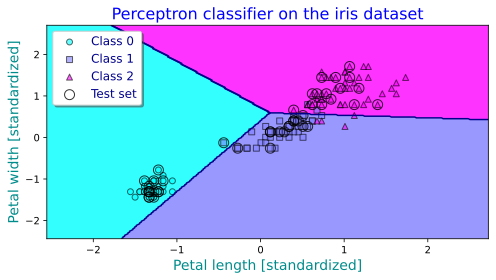

In [9]:
# 'np.vstack' means concatenate along the vertical axis
X_combined_std = np.vstack((X_train_std, X_test_std))
# in scikit-learn, labels are horizontal vectors...
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(7, 4))
plt.title("Perceptron classifier on the iris dataset", fontsize=16, color='blue')
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]', fontsize=14, color='darkcyan')
plt.ylabel('Petal width [standardized]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<a id="2"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>2. LOGISTIC REGRESSION</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2a. The logistic sigmoid function</font><a id="2a"></a></p>$\quad$
        Favoured by bookmakers in the United Kingdom and Ireland, and also common in horse racing, <font color='purple'>fractional odds</font> quote the net total that will be paid out to the bettor, should they win, provided they bet $1$. Odds of $5/1$ would imply that the bettor stands to make a $500$ profit on a $100$ stake. If the odds are $1/5$, the bettor will make $20$ on a $100$ stake. In either case, having won, the bettor always receives the original stake back; so if the odds are $5/1$ the bettor receives a total of $600$. If the odds are $\; (fo) \;$ and the bettor bets $1$, he will make $\, (fo) \,$ and receives $\; \left(fo+1\right) \,$; so if he plays $\; \left(fo+1\right) \,$ times, loses $\, (fo) \,$ times and wins once, then his net gain will be $0$. Hence, in a fair game, his probability of winning would be $\; p \,=\, \frac{1}{fo+1} \,$. Conversely, if $p$ is the winning probability, then $\; fo = \frac{1-p}{p} \,$.<br>
    Fractional odds are the inverse of what is called <font color='darkpink'>odds</font> in probability theory :<br>
    <font color='purple'>$$\text{odds} \;:=\; \frac{p}{1-p} \,\qquad (1)$$</font><br>$\quad$
        The natural logarithm of the odds is called the <font color='darkpink'>logit function</font> or, more concisely, the <font color='darkpink'>logit</font> :<br>
    <font color='purple'>$$\text{logit} :\; p \in \left]\,0\,; 1\right[ \;\;\mapsto \;\text{logit}(p) = \text{ln}\left(\frac{p}{1-p}\right) \in \mathbb{R} \,\qquad (2)$$</font><br>$\quad$
        The logit is used in many fields. In machine learning it can be used to build a binary classifier which performs very well on linearly separable classes and is one of the most widely used algorithms for classification in industry, the <font color='darkpink'>logistic regression</font>. Logistic regression, despite its name, is not a regression algorithm but a binary classification algorithm.<br>$\quad$
        Under the logistic regression model, we assume that there is the same affine relationship between the feature values of any instance and the logit of the probability that this instance belongs to the class $1$ : for any instance $\; x = \left( x_j \right)_{j=1}^{n}$, if $p$ is the probability that $x$ belongs to class $1$, we have<font color='purple'>
        $$\text{logit}\,(p) \;=\; \sum_{j=1}^n \, w_{j} \, x_{j} \,+\, b \;=\; w.x \,+\, b \,\qquad (3)$$</font>
    where the <font color='darkpink'>weight vector</font> $\; w = \left( w_j \right)_{j=1}^{n}\;$ and the <font color='darkpink'>bias</font> $\, b \,$ do not depend on $x$. In order to predict the class of $x$ we will use the probability that it belongs to the class $1$, ie $p$.<br><br>$\quad$
        The inverse of the logit function is called the <font color='darkpink'>(logistic) sigmoid function</font> :<br>
        <font color='darkpink'>$$\sigma : t \in \mathbb{R} \mapsto \sigma(t) = \frac{1}{1+e^{-t}} \,\qquad (4)$$</font>$\quad$
            Let's plot both functions (I use my own code instead of the code provided by the book, which only shows the graph of the sigmoid function, and my graphs are nicer) :

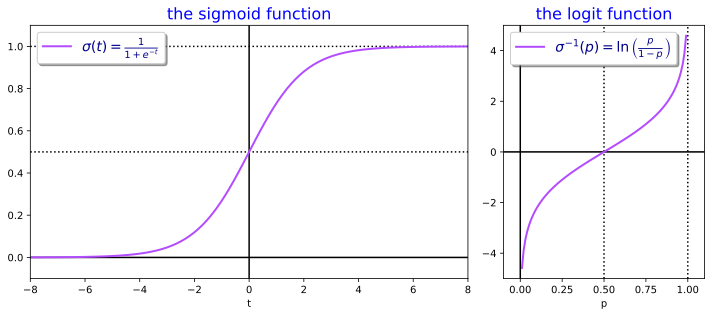

In [10]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

def logit(p):
    return np.log(p/(1-p))

# linspace(start, stop, num=50, endpoint=True) returns 'num' evenly spaced points over [start, stop],
# including 'start' and, since 'endpoint'=True, 'stop'
t = np.linspace(-8, 8, 100)
sig = sigmoid(t)

p = np.linspace(0,1,100)[1:99]
x = logit(p)

plt.figure(figsize=(10, 4.5))
# plot the sigmoid function
plt.subplot2grid((2,3),(0,0), rowspan=2, colspan=2)
plt.plot([-8, 8], [0, 0], 'k-')
plt.plot([-8, 8], [0.5, 0.5], 'k:')
plt.plot([-8, 8], [1, 1], 'k:')
plt.plot([0, 0], [-1.1, 1.1], 'k-')
plt.plot(t, sig, ls='-', lw=2, color=cmap(0.7), label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(fancybox=True, shadow=True, fontsize=14, labelcolor='darkblue')
plt.axis([-8, 8, -0.1, 1.1])
plt.title("the sigmoid function", fontsize=16, color='blue')

# plot the logit function
plt.subplot2grid((2,3),(0,2), rowspan=2)
plt.plot([-0.1,1.1], [0,0], 'k-')
plt.plot([0,0], [-5,5], 'k-')
plt.plot([.5,.5], [-5,5], 'k:')
plt.plot([1,1], [-5,5], 'k:')
plt.plot(p,x, ls='-', lw=2, color=cmap(0.7), label=r"$\sigma^{-1}(p) = \ln\left(\frac{p}{1-p}\right)$" )
plt.xlabel("p")
plt.legend(fancybox=True, shadow=True, fontsize=14, labelcolor='darkblue')
plt.axis([-0.1, 1.1, -5, 5])
plt.title("the logit function", fontsize=16, color='blue')

plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2b. The logistic regression strategy</font><a id="2b"></a></p>$\quad$
        Alike Adaline, the logistic regression model uses a cost function to obtain good weights (and a good bias); using $(3)$ and $(4)$ we will then be able to compute the probability that an instance $x$ belongs to the class $1$, <br>
    <font color='darkpink'>$$p \;=\; \sigma(w.x \,+\, b) \,\qquad (5)$$</font>
    and $x$ will be predicted to belong to the class $1$ iff $\; \sigma(w.x \,+\, b) \geq 0.5\,$, ie iff $\; w.x \,+\, b \geq 0 \,$. Note that the probability is interesting in itself; for example, it is used in weather forecast "not only to predict whether it will rain on a particular day, but also to report the chance of rain. Similarly, logistic regression can be used to predict the chance that a patient has a particular disease given certain symptoms, which is why logistic regression enjoys great popularity
in the field of medicine".<br>$\quad$
        Apart from the choice of the cost function (see next subchapter), the main difference between the logistic regression and Adaline is that the activation function was the identity in Adaline, and now it is the logistic sigmoid. Both strategies are summarized in the following diagram :

<figure style="text-align: center;">
    <img src="3.1. The logistic regression strategy.png" alt="Comparison between the Adaline and the logistic regression strategies. Adaline uses the MSE cost function on the net inputs and aims to minimize their total cost, while logistic regression applies the sigmoid function to these net inputs and aims to minimize the logistic loss (see next subchapter)." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The logistic regression strategy</figcaption>
</figure>

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2c. The logistic loss function</font><a id="2c"></a></p>$\quad$
        Now, in order to complete our logistic regression method, we need to find a good weight vector and a good bias. The idea of the logistic regression method is to use those which will maximize the likelihood that each instance $x^{(i)}$ of the training matrix would be predicted the right class $y^{(i)}$. There are only $2$ classes, $0$ and $1$, and we know that the probability that an instance $x$ belongs to the class $1$ will be given by $(5)$; hence, given $w$ and $b$, any instance will follow the Bernouilli distribution<br><font color='purple'>
        $$P\left(x^{(i)} \text{ in class } y^{(i)} \,\big/\, w, b\right) \;=\; p_i^{y^{(i)}} \, \left(1-p_i\right)^{\left(1-y^{(i)}\right)} \,\qquad (6)$$</font>
    where <font color='purple'>$p_i \;=\; \sigma(w.x^{(i)} \,+\, b)$</font>. Assuming independance of the instances, the probability that all instances are predicted the correct classes is<br><font color='purple'>
        $$P\left(X \text{ is predicted } y \,\big/\, w, b\right) \;=\; \prod_{i=1}^{m} \, p_i^{y^{(i)}} \, \left(1-p_i\right)^{\left(1-y^{(i)}\right)} \,\qquad (7)$$</font>$\quad$
    So $(7)$ is what we want to maximize. Maximizing $(7)$ is equivalent to maximizing its natural logarithm; or, equivalently, we are looking for the weight vector and the bias which minimize the <font color='darkpink'>logistic loss function</font><br>
    <font color='darkpink'>$$L\left(w, b\right) \;=\; -\, \frac{1}{m} \, \sum_{i=1}^{m} \, \left[ y^{(i)} \, \ln\left(\sigma(w.x^{(i)} \,+\, b)\right) + {\left(1-y^{(i)}\right)} \, \ln\left(1-\sigma(w.x^{(i)} \,+\, b)\right) \right] \,\qquad (8)$$</font>
    Note that the cost for a single instance $i$ would be<br><font color='purple'>
        $$- \, \left[ y^{(i)} \, \ln\left(p_i\right) \,+\, {\left(1-y^{(i)}\right)} \ln\left(1-p_i\right) \right] \,\qquad (9)$$</font>
    so if $y^{(i)} = 1$ the cost is $\,\ln\left(p_i\right)$, while if $y^{(i)} = 0$ then it is $\,\ln\left(1-p_i\right)$. We see that in both cases, a wrong certainty would cost infinitely.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2d. The Hessian of the logistic loss function</font><a id="2d"></a></p>$\quad$
        In this subchapter I show that the logistic loss function is convex by showing that its Hessian is positive. In doing so I will compute its gradient, which will prove useful for the Gradient Descent methods if we want to code them instead of using <font color='green'>scikit-learn</font>.<br>
    I begin by using the same trick I used in my second part, adding the bias to the weight vector, as its $0$-th component, and adding a column of $1$ as the first column of the training matrix, so that the logistic loss function can be written in a simpler form, as<br>
    <font color='darkpink'>$$L\left(w\right) \;=\; -\, \frac{1}{m} \, \sum_{k=0}^{m} \, \left[ y^{(k)} \, \ln\left(\sigma(w.x^{(k)} )\right) + {\left(1-y^{(k)}\right)} \, \ln\left(1-\sigma(w.x^{(k)})\right) \right] \,\qquad (10)$$</font>
    Now<br>
    <font color='purple'>$$\nabla L\left(w\right) \;=\; -\, \frac{1}{m} \, \sum_{k=0}^{m} \, \left[ y^{(k)} \, \frac{\sigma'(w.x^{(k)})}{\sigma(w.x^{(k)})} + {\left(1-y^{(k)}\right)} \, \frac{-\sigma'(w.x^{(k)})}{1-\sigma(w.x^{(k)})} \right] (x^{(k)})^T \,\qquad (11)$$</font><br>
    This can be simplified. Indeed $\, \forall t \in \mathbb{R}$<br><font color='purple'>
    $$\sigma'(t) \;=\; \frac{e^{-t}}{\left(1+e^{-t}\right)^2} \;=\; \frac{1}{4\cosh\left(\frac{t}{2}\right)^2} \,\qquad (12)$$</font>
    so<br><font color='purple'>
    $$\frac{\sigma'(t)}{1-\sigma(t)} \;=\; \frac{e^{-t}}{\left(1+e^{-t}\right)^2} \,\times\, \frac{\left(1+e^{-t}\right)}{e^{-t}} \;=\; \frac{1}{1+e^{-t}} \;=\; \sigma(t) \,\qquad (13)$$</font>
    and<br><font color='purple'>
    $$\frac{\sigma'(t)}{\sigma(t)} + \frac{\sigma'(t)}{1-\sigma(t)} \;=\; \frac{e^{-t}}{\left(1+e^{-t}\right)^2} \, \left(1+e^{-t}\right) \,+\, \frac{1}{1+e^{-t}} \;=\; 1 \,\qquad (14)$$</font><br>
    Consequently<br><font color='darkpink'>
    $$\nabla L\left(w\right) \;=\; -\, \frac{1}{m} \, \sum_{k=0}^{m} \, \left[ y^{(k)} \,-\, \sigma(w.x^{(k)})\right] (x^{(k)})^T \,\qquad (15)$$</font>
    and<br><font color='purple'>
    $$\nabla^2 L\left(w\right) \;=\; \frac{1}{m} \, \sum_{k=0}^{m} \, \frac{1}{4\cosh\left(\frac{w.x^{(k)}}{2}\right)^2} \; (x^{(k)})^T \; (x^{(k)}) \,\qquad (16)$$</font>
    so $\forall \xi \in \mathbb{R}^{n+1}$<br><font color='purple'>
    $$\xi \,.\, \nabla^2 L\left(w\right) \xi \;=\; \frac{1}{m} \, \sum_{k=0}^{m} \, \left\lVert \frac{x^{(k)}.\xi}{2\cosh\left(\frac{w.x^{(k)}}{2}\right)} \right\rVert^2 \,\qquad (17)$$</font><br>$\quad$
    This proves that the Hessian of the logistic loss function is positive; and that it is definite iff there is enough variety in the instances for the training matrix to be surjective. So the logistic loss function has at most one minimum, that we can approach as close as needed with a Gradient Descent method, using $(15)$.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2e. Logistic regression with the Batch Gradient Descent</font><a id="2e"></a></p>$\quad$
        The following code is given in the book. It codes the logistic regression with a Batch Gradient Descent.

In [11]:
class LogisticRegressionGD:
    """Logistic regression classifier.
    
    Parameters
    ------------
    eta : the learning rate (a float between 0.0 and 1.0)
    n_iter : the number of passes over the training dataset (an int)
    random_state : a random number generator seed for random weight initialization (an int)
    
    Attributes
    -----------
    w_ : the weight vector (a 1d-array of floats)
    b_ : the bias (a float)
    losses_ : the MSE value at each epoch (a 1d array of floats)
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.
        Parameters
        ----------
        X : the training matrix, of shape n_examples*n_features
        y : the target vector, of length n_examples
        Returns
        -------
        self : Instance of LogisticRegressionGD
        """
        # rgen = np.random.RandomState(self.random_state)
        # the modern way (according to chatGPT) is :
        rgen = np.random.default_rng(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # the logistic regression, contrary to Adaline, has an activation function, the sigmoid
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (-y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output))) / X.shape[0])
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        # 'np.clip(z, -250, 250)' limits the values in the array z to be within the range [−250,250].
        # Any values in z that are less than -250 are set to -250, and any values greater than 250 
        # are set to 250.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's try our implementation of the logistic regression. Since the logistic regression model is a binary classifier we restrict the iris dataset to only the setosa and the versicolor flowers.

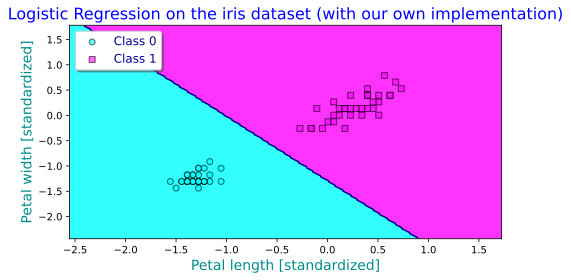

In [12]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)

plt.figure(figsize=(7, 4))
plt.title("Logistic Regression on the iris dataset (with our own implementation)", fontsize=16, color='blue')
# 'plot_decision_regions' is defined cell 8
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel("Petal length [standardized]", fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2f. Logistic regression with scikit-learn</font><a id="2f"></a></p>$\quad$
        Let's now use <font color='green'>scikit-learn</font> 'LogisticRegression' (see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).<br>$\quad$
        S. Raschka (the book's author) chose to use the '<font color='green'>lbfgs</font>' optimization algorithm rather than a Gradient Descent, which is not implemented in <font color='green'>scikit-learn</font> (probably not efficient enough); 'lbfgs' is indeed the default as of February 2025.<br>
    The <font color='green'>scikit-learn</font> page presents the strengths of the various algorithms it proposes, and recommends '<font color='green'>liblinear</font>' for small datasets; since our dataset is small I add a cell after the book's cell with 'liblinear', with similar results.<br>$\quad$
        The book also uses '<font color='green'>C</font>' (default value $1.0$), which is a regularization parameter (see next subchapter), and '<font color='green'>ovr</font>', also named OvA (see [1a.](#1a)).<br>
        Note that for multi-class problems 'ovr' is not the default; the default is to use the <font color='darkpink'>cross-entropy cost function</font> (see part 12, which is part 2 of my "Deep learning" repo, "3c. The various steps for building an ANN", "step 3"), when available; 'liblinear' is limited to one-versus-rest schemes.

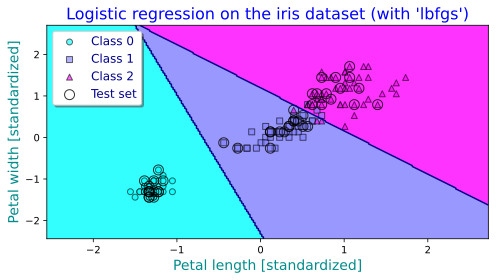

In [13]:
from sklearn.linear_model import LogisticRegression
# 'C' is a regularization parameter, 'lbfgs' is an optimization algorithm, and 'ovr' is OvA
lr = LogisticRegression(C=100.0, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("Logistic regression on the iris dataset (with 'lbfgs')", fontsize=16, color='blue')
# 'X_combined_std' and 'y_combined' have been defined cell 9;
# 'test_idx' is the set of indices of the test dataset
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

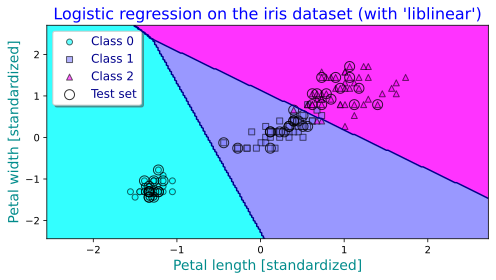

In [14]:
from sklearn.linear_model import LogisticRegression
# 'C' is a regularization parameter, 'lbfgs' is an optimization algorithm, and 'ovr' is OvA
lr = LogisticRegression(C=100.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("Logistic regression on the iris dataset (with 'liblinear')", fontsize=16, color='blue')
# 'X_combined_std' and 'y_combined' have been defined cell 9;
# 'test_idx' is the set of indices of the test dataset
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The probability that training examples belong to a certain class can be computed using the '<font color='green'>predict_proba</font>' method. For example, we can predict the probabilities of the first three examples in the test dataset as follows; the $n$-th row corresponds to the class membership probabilities of the $n$-th flower :

In [15]:
print(MB, lr.predict_proba(X_test_std[:3, :]))

 [[3.17983737e-08 1.44886616e-01 8.55113353e-01]
 [8.33962295e-01 1.66037705e-01 4.55557009e-12]
 [8.48762934e-01 1.51237066e-01 4.63166788e-13]]


<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The predicted class will be the one with the highest probability; we can use the <font color='green'>predict</font> method to directly get them ($2$ corresponds to "Iris-virginica" and $0$ to "Iris-setosa") :

In [16]:
print(MB, lr.predict(X_test_std[:3, :]))

 [2 0 0]


<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Lastly, a word of caution if you want to predict the class label of a single flower example : <font color='green'>scikit-learn</font> expects a two-dimensional array as data input; thus, we have to convert a single row slice into such a format first. One way to convert a single row entry into a two-dimensional data array is to use NumPy’s'<font color='green'>reshape</font>' method to add a new dimension; for example if we want to transform the $i$-th row into a $2d$ array we can use '<font color='green'>X_test_std[i, :].reshape(1, -1)</font>', where 'reshape(1, -1)' means that we want Numpy to reshape the row into a $2d$-array composed of $1$ row and a number of columns that should be inferred by Numpy.

In [17]:
print(MB, lr.predict(X_test_std[1, :].reshape(1, -1)))

 [0]


<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>2g. Overfitting and regularized linear models</font><a id="2g"></a></p>$\quad$
        Up to now, except in general presentations, we have only used two cost functions, the MSE and the logistic loss. We started with the net inputs (the affine transformations of the inputs involving the weights and the bias), and then computed the MSE on them (considering that they were our predictions), or we computed the logistic loss function of their images via the sigmoid function. And then we used an optimization technique to try and find the weights and bias which optimize the cost.<br>$\quad$
        But, if there are not enough samples, an outlier will be comparatively costly, the weights and bias will be adapted to minimize its cost, so by fitting closely to the training data our model will not represent the general data well. In the long run, the outliers will be proportionately numbered (or outnumbered), so our cost function will be fine, but before that we risk "<font color = darkpink>overfitting</font>", ie fitting too closely to instances that are not representative of the whole. The goal of regularization is to reduce this problem. By so doing we must take care to not regularize too much, or we risk "<font color = darkpink>underfitting</font>", ie not being adapted well enough to our training data. Underfitting and overfitting are presented in the following diagram :

<figure style="text-align: center;">
    <img src="3.2. Underfitting and overfitting.png" alt="Examples showing two classes and what it means for an optimization algorithm to be underfitted, well-fitted and overfitted. The first diagram shows a straight line cutting through instances of both classes, separating them loosely. The second diagram shows a regular line separating both classes rather well, with only one instance on the wrong side of the line; this instance is an outlier, lying among the elements of the other class. And the third diagram shows a line separating both classes perfectly, but the line itself is wiggling too closely, and we can imagine that it won't separate further instances well, especially those near the outlier." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Examples of underfitted, well-fitted and overfitted models</figcaption>
</figure>

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        In order to regularize our weights, we will use a cost function which mitigates the cost of individual instance prediction errors with a cost on the weights themselves. We would rather use smaller weights and potentially some of them $0$ to eliminate unimportant features, and at the same time not give too much importance to some features and get a more balanced model. This is done by :<br>$\quad$
        <font color='darkpink'> $1.$ Scaling the features of the training set</font>, eg with standardization, so they have equal importance, as we did above<br/>
        and <font color='darkpink'> $\;\;2.$ Adding a cost for the weights</font> to our original cost for the errors :<br><font color='darkpink'>
        $$Lr(w) =  L(w) \; + \: \frac{\lambda}{m} \sum_{j=1}^n w_j^2 \; + \: \frac{\mu}{m} \sum_{j=1}^n \lvert w_j \rvert \quad ; \; \lambda , \mu \geq 0 \,\qquad (18)$$</font>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Notes :</font></p> $\quad$
        * here I use the usual trick of integrating the bias as the $0$-th component of the weight vector and a $1$ to the left of instances (including a column composed of $1$ to the left of the training matrix)<br>$\quad$
        * there is no cost added for the bias : it is not associated with any feature so regularizing it  would only interfere with the model's ability to correctly capture the global properties of the data<br><br>$\quad$
        Let's present the three most used regularization methods :

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
</font><span style="color: purple; font-size: 14px; margin-right: 5px; vertical-align: center;">■</span><font color='darkpink'>$L^2$-regularization</font>, also called <font color='darkpink'>Ridge regression</font> corresponds to <font color='purple'>$\;\lambda > 0 \;\text{ and }\; \mu = 0\;$</font> in $(18)$ :<br>$\quad$
    This is the most common choice, and is the default '<font color='green'>penalty</font>' in <font color='green'>scikit-learn</font>, where it is explicitly chosen via '$\,$<font color='green'>penalty = 'l2'</font>$\,$'. The value of the parameter $\lambda$ can be specified via '$\,$<font color='green'>alpha=$\alpha$</font>$\,$' where $\alpha = \frac{2\lambda}{m}$, or via '$\,$<font color='green'>$C=c$</font>$\,$' where $c = \frac{1}{\alpha}$, according to the optimization algorithm ('<font color='green'>SGDRegressor</font>' or '<font color='green'>LogisticRegression</font>' respectively).<br>$\quad$
    The added cost is $C^{\infty}$ so, in the case of the original cost being the $MSE$ or the logistic loss, the regularized cost is still $C^{\infty}$; moreover its hessian matrix is<br><font color='purple'>
    $$\nabla^2 \left[ \frac{\lambda}{m} \sum_{j=1}^n w_j^2 \right] \;=\; \frac{2\lambda}{m} \, I' \qquad\text{ where }\; I' = Diag(0, 1, 1, \cdots, 1) \in \mathbb{R}^{(n+1)\times(n+1)} \,\qquad (19)$$</font>
Consequently, in the case of the original cost being the $MSE$ or the logistic loss, <font color='purple'>the Hessian of the regularized cost is positive</font> (as the sum of two positive matrices), <font color='purple'>and definite</font> since $\; I' \,\xi \,=\, 0 \;$ would imply $\; \xi_1, \cdots, \xi_n \,=\, 0\;$ and then $\; \nabla^2 L(w)\xi = 0\;$ will imply $\, b=0\,$ (according to part 2 equation $(34)$ for the $MSE$, and to equation $(17)$ (term $\,k=0$) here for the logistic loss). Hence <font color='darkpink'>the regularized $MSE\,$ and the regularized logistic loss have a unique minimum</font>.<br>$\quad$
    Moreover, in the case of the $MSE$,<br><font color='purple'>
    $$\nabla Lr(w) \;=\; \frac{2}{m} \, X^T \, (X \, w - y) \,+\, \frac{2 \lambda}{m} \, I' \, w \,\qquad (20)$$</font>
so $\,\nabla Lr(w) = 0\,$</font> iff<br>
    $$(X^T X \, + \, \lambda I')w \;=\; X^T \, y \,\qquad (21)$$</font><br>$\quad$
Since $\, (X^T X \, + \, \lambda I') \,$ is positive definite it is invertible, and the $MSE$ has one unique minimum, which is always defined by the "<font color='purple'>regularized normal equation</font>" :<br><font color='darkpink'>
    $$w_{min} \;=\; (X^T X \, + \, \lambda I')^{-1} \, X^T \, y \,\qquad (22)$$</font>
    Hence another advantage of the $L^2$-regularization is that <font color='darkpink'>in the case of the $MSE\,$ the solution is already known.</font>

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
<span style="color: purple; font-size: 14px; margin-right: 5px; vertical-align: center;">■</span><font color='darkpink'>$L^1$-regularization</font>, also called <font color='darkpink'>Lasso regression</font> corresponds to <font color='purple'>$\;\lambda = 0 \;\text{ and }\; \mu > 0\;$</font> in $(18)$ :<br>$\quad$
    It corresponds to '$\,$<font color='green'>penalty = 'l1'</font>$\,$' in <font color='green'>scikit-learn</font>. The value of the parameter $\mu$ can be specified via '$\,$<font color='green'>alpha=$\alpha$</font>$\,$' where <font color='green'>$\alpha = \frac{\mu}{m}$</font>, or via '$\,$<font color='green'>$C=c$</font>$\,$' where $c = \frac{1}{\alpha}$, according to the optimization algorithm ('<font color='green'>SGDRegressor</font>' or '<font color='green'>LogisticRegression</font>' respectively).<br>$\quad$
    It means Least Absolute Shrinkage and Selection Operator. In Ridge regression the components of $w$ are squared, so the least important are reduced even further, so in order to reduce the value of the regularizer it is more efficient to reduce $w$ largest components. In Lasso regression the components of $w$ are not squared, hence Lasso regression tends to eliminate $w$ small coefficients as much as the larger ones, and leads to <font color='darkpink'>sparse models</font> (models with many '$0$'). So $L^1$-regularization helps eliminate unimportant features. <br/>$\quad$
    Since absolute values are not differentiable there is no closed solution as there was with Ridge regression (equation (22)) ; but we define a pseudo-gradient for the added cost, to use with Gradient Descent methods :<br><font color='purple'>
    $$g(w) \;=\; \frac{\mu}{m} \, \epsilon(w) \quad\text{ with }\;\; \epsilon(w) := (\epsilon(w_j))_{j=1}^n \;\text{ where }\; \epsilon(w_j) := \begin{cases} 1 & \text{if } w_j>0 \\ 0 & \text{if } w_j=0 \\ -1 & \text{if } w_j<0 \end{cases} \,\qquad (23)$$

<br/><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
</font><span style="color: purple; font-size: 14px; margin-right: 5px; vertical-align: center;">■</span><font color='darkpink'>Elastic net regression</font> is the general case <font color='purple'>$\;\lambda > 0 \;\text{ and }\; \mu > 0\;$</font> in $(18)$ :<br>$\quad$
    It corresponds to '$\,$<font color='green'>penalty = 'elasticnet'</font>$\,$' in <font color='green'>scikit-learn</font>. The values of the parameters $\lambda$ and $\mu$ can be specified via '<font color='green'>$\,$alpha=$\alpha\,$</font>' and '<font color='green'>$\,$l1_ratio=$\beta\,$</font>' where $\,\alpha = \frac{2\lambda + \mu}{m}\,$ and $\,\beta = \frac{\mu}{2\lambda+\mu}$.<br>$\quad$
    It is a mixture of the Ridge and the Lasso regressions, and is generally preferred over Lasso regression when dealing with more features than instances or with strongly correlated features because Lasso may behave erratically then. <br/>
    Because of its $l^1$ regularizer it has no rigorously defined gradient, nor closed solution for $w_{min}$ (like (22) for the Ridge regression). Its pseudo-gradient is obtained from the gradient of the Ridge and the pseudo-gradient of the Lasso, according to ChatGPT.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's show an example of the effect of the regularization's strength over the size of the weights.<br>
    In the code below we use the '<font color='green'>LogisticRegression</font>' algorithm of <font color='green'>scikit-learn</font> with the $L^2$ penalty, with various values of <font color='green'>C</font>, which is inversely proportional to the strength of the regularization term. We see that when the regularization is big the weights are almost $0$, and when we decrease the importance of the $l^2$ term, they converge towards values a little beyond $2$ and $-2$.

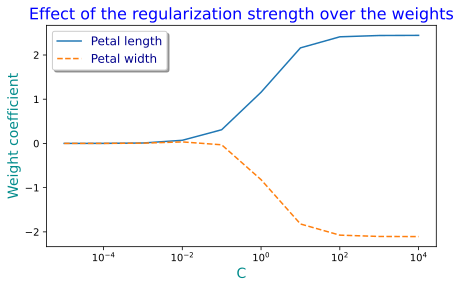

In [18]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)
weights = np.array(weights)

plt.figure(figsize=(7, 4))
plt.title("Effect of the regularization strength over the weights", fontsize=16, color='blue')
plt.plot(params, weights[:, 0], label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='Petal width')
plt.xlabel("C", fontsize=14, color='darkcyan')
plt.ylabel("Weight coefficient", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# the values along the x-axis will follow a logarithmic scale
plt.xscale('log')
plt.show()

<a id="3"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>3. SUPPORT VECTOR MACHINES</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3a. Linear SVM Classification. The hard margin case</font><a id="3a"></a></p>$\quad$
        The goal of a linear SVM classification is to linearly separate two classes ; in the hard margin case these classes need to be linearly separable.<br/>
    The number of straight lines that can separate two linearly separable classes is infinite. However, there is only one that has the largest possible margin, i.e. the greatest distance between itself and the two classes. Linear SVM classification aims to identify and return this particular straight line, hoping that if new data deviates slightly from the known members of its class it will still be correctly predicted.<br/>
    Let's visualize the idea on a diagram :

<figure style="text-align: center;">
    <img src="3.3. Decision boundary of a SVM.png" alt="Diagram showing two linearly separable classes and the decision boundary of an SVM. The first diagram shows three separating lines; they pass very close to some datapoints, suggesting that another datapoint of the same class might appear on the wrong side of the line. The line which minimizes the risk is the line which is the farthest from both class instances; it is called the 'decision boundary'. The decision boundary is shown in the second diagram, together with the one parallel line passing by one element of the first class and the symmetrical parallel line passing by two elements of the other class." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">SVM maximizes the margin between the decision boundary and the training data points</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As already mentioned, the hard margin case needs two separable classes. Contrary to what was done in the linear classification and regression cases, these classes are here denoted by $-1$ and $1$, instead of $0$ and $1$. Also we will not integrate the bias as the $0$-th component of the weight vector, neither add a $1$ in front of instances. This is because our tool of choice will be the separating hyperplanes, and hyperplanes naturally have two parameters, $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$.<br>$\quad$
        For any such $w$ and $b$, let's denote<br><font color='darkpink'>
    $$H\left(w,b\right) \;=\; \left\{ x\in\mathbb{R}^n \,,\; w.x + b \,=\, 0 \right\} \,\qquad (24)$$</font><br>$\quad$
        Note that<br><font color='purple'>
    $$\forall c \in \mathbb{R}^* \quad H(cw,cb) \;=\; H(w,b) \,\qquad (25)$$</font><br>
    so $w$ can be any vector perpendicular to $H(w,b)$; it is, indeed, perpendicular to $H(w,b)$ since
    $$\forall x_A, x_B \in H(w,b) \quad w.(x_A-x_B) = w.x_A - w.x_B = -b -(-b) = 0 \,\qquad (\mathrm{26})$$<br>$\quad$
        Now, consider any hyperplane $H(w,b)$ and any point $x$ in $\mathbb{R}^n$, and let's denote by $x_{\perp}$ the orthogonal projection of $x$ onto $H$. $\left(x-x_{\perp}\right)$ is colinear with $w$ and $x_{\perp} \in H$ so<br><font color='purple'>
    $$x-x_{\perp} \;=\; \left(\frac{w}{\left\lVert w \right\rVert} \,,\, x-x_{\perp}\right) \, \frac{w}{\left\lVert w \right\rVert} \;=\; \frac{w.x+b}{\left\lVert w \right\rVert^2} \, w \,\qquad (27)$$</font>
    Hence the distance between $x$ and $H$ is<br><font color='darkpink'>
    $$\text{dist}\left(x,H\right) \;=\; \left\lVert x-x_{\perp} \right\rVert \;=\; \frac{\left\lvert w.x+b \right\rvert}{\left\lVert w \right\rVert} \,\qquad (28)$$</font><br>$\quad$
        Coming back to our problem at hand, we know by hypothesis that the classes are linearly separable, ie there are hyperplanes $H(w,b)$ located between the training points of class $-1$ and those of class $1$; by multiplying $w$ and $b$ by $-1$ if necessary, this means the following relations between the training points and these hyperplanes :<br><font color='purple'>
    $$y^{(i)} = 1 \;\text{ iff }\; w.x^{(i)}+b > 0 \quad\text{ and }\quad y^{(i)} = -1 \;\text{ iff }\; w.x^{(i)}+b < 0 \,\qquad (29)$$</font>$\quad$
        $(29)$ can be written more simply in a single equation<br><font color='purple'>
    $$\forall i \in \left\{1, \cdots, m\right\} \quad y^{(i)} \times \left(w.x^{(i)}+b\right) > 0 \,\qquad (30)$$</font><br>$\quad$
        Let's define<br><font color='purple'>
    $$\delta:\; \mathbb{R}^{n}\times\mathbb{R} \to \mathbb{R} \;\;/\;\; (w,b) \mapsto \frac{1}{\left\lVert w \right\rVert} \times \min_{\substack{i=1,\cdots, m}}\; y^{(i)} \times \left(w.x^{(i)}+b\right) \,\qquad (31)$$</font><br>$\quad$
        Since there is a finite number of training points, a hyperplane $H(w,b)$ separates both classes (and is well oriented) iff $\delta(w, b) > 0$. Moreover, in this case, according to $(28)$, $(30)$ and the fact that $y^{(i)} = \pm1$, the minimal distance between $H(w,b)$ and the training points is precisely $\delta(w,b)$. So what we are trying to do in the hard margin case of the SVM algorithm is to try and maximize $\delta$.<br>$\quad$
    According to $(25)$, $H(w,b) = H\left(\frac{w}{min}, \frac{b}{min}\right)$ where $min := \min_{\substack{i=1,\cdots, m}}\; y^{(i)} \times \left(w.x^{(i)}+b\right)$, so, denoting by $\mathcal{E}$ the set of all the training points and only considering the hyperplanes that pass between the two classes of datapoints,<br>
    $$\underset{w,b}{\text{argmax}}\,\big\{\text{dist}(H(w,b), \mathcal{E}); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R}\big\} \;\;=\;\; \underset{w,b}{\text{argmax}}\,\left\{\text{dist}\left(H\left(\frac{w}{min},\frac{b}{min}\right), \mathcal{E}\right); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R}\right\}$$
    Moreover<br>
    $$\left\{\text{dist}\left(H\left(\frac{w}{min},\frac{b}{min}\right), \mathcal{E}\right); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R}\right\} \;\;=\;\; \big\{\text{dist}\left(H(w,b), \mathcal{E}\right); \;\, w \in \mathbb{R}^{n*}, \, b \in \mathbb{R} \;\text{ st } min = 1 \big\}$$<br>
    But for any $(w,b)$ in the last set we have<br>
    $$\text{dist}\left(H(w,b), \mathcal{E}\right) \;=\; \delta(w,b) \;=\; \frac{1}{\lVert w \rVert}$$<br>
    so the problem is equivalent to try and find among the hyperplanes $H(w,b)$ such that $\,min = 1$ the one with the largest possible $\frac{1}{\lVert w \rVert}$, or, equivalently, the smallest $\frac{1}{2} \lVert w \rVert^2$.<br>
    Note that $min=1$ is arbitrary : by multiplying by $\frac{c}{min}$ instead of $\frac{1}{min}$ for any $c>0$ we would have obtained the equivalent problem : try and find among the hyperplanes $H(w,b)$ such that $\,min = c$ the one with the largest possible $\frac{1}{\lVert w \rVert}$, or, equivalently, the smallest $\frac{1}{2} \lVert w \rVert^2$. The solution $H(w,b)$ does not depend on $c$, it is the same for all the $c>0$.<br>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Consider a hyperplane $H(w_0,b_0)$ with $min=1$ which passes between the two classes of points. It is not necessarily the hyperplane $H(w,b)$ with $min=1$ which maximizes $\frac{1}{\lVert w \rVert}$; but it can help us in restricting the hyperplanes that we need to consider : for our problem we only need to consider the hyperplanes $H(w,b)$ with $min=1$ such that $\frac{1}{\lVert w \rVert} \geq \frac{1}{\lVert w_0 \rVert}$ or, equivalently, such that $\lVert w \rVert \leq \lVert w_0 \rVert$.<br>$\quad$
        Moreover, since there are points in both classes, let's consider one point in class $1$, say $s$, and another in class $-1$, say $t$. For any hyperplane $H(w,b)$ that we consider, since its $min$ is $1$, we have $w.s+b \geq 1$ and $-(w.t+b) \geq 1$, so $1-w.s \leq b \leq -1-w.t$.<br>$\quad$
        Now, consider the function $(w,b) \in \mathbb{R}^{n*}\times\mathbb{R} \mapsto \frac{1}{\lVert w \rVert}$. It is continuous, so it reaches its bounds on the compact<br>
        $$K = \big\{(w,b) \in \mathbb{R}^{n*} \times \mathbb{R}\;\text{ st } min=1 \big\} \cap B\left(0,\lVert w_0 \rVert\right) \times \left[1-w.s,-1-w.t\right]$$
    where $B\left(0,\lVert w_0 \rVert\right)$ is the closed ball of center $0$ and radius $\lVert w_0 \rVert$. $K$ is compact as a closed and bounded subset of a finite dimensional space. So there exists at least one point $(w_M,b_M)$ with $min=1$ which maximizes $\frac{1}{\lVert w \rVert}$, or, equivalently, which minimizes $\frac{1}{2} \lVert w \rVert^2$.<br>$\quad$
        As already mentioned $H(w_M,b_M)$ is also a solution of : try and find among the hyperplanes $H(w,b)$ such that $\,min = c$ the one with the largest possible $\frac{1}{\lVert w \rVert}$, or, equivalently, the smallest $\frac{1}{2} \lVert w \rVert^2$.<br>
    Consequently, it is also a solution of the optimization problem :<br><br><font color='darkpink'>
    $$\begin{cases} & \text{minimize}_{\substack{w,b}} \; \; \frac{1}{2} \lVert w \rVert^2 \\\\ \text{ subject to } & \forall i=1,\cdots, m \quad y^{(i)} \times \left(w.x^{(i)}+b\right) \;\geq\; 1 \end{cases} \, \,\qquad (32)$$</font><br>$\quad$
        Indeed, since our condition $min=1$ is slightly more restrictive, $\frac{1}{2} \lVert w_M \rVert^2$ is greater than or equal to the minimum of $(32)$. But if $(32)$ had a solution $(w',b')$ with a strictly smaller $\frac{1}{2} \lVert w' \rVert^2$ such a solution would have a $min=c>1$; but we know that among the hyperplanes $H(w,b)$ with a $min=c$, $H(w_M,b_M)$ is one with the minimal $\frac{1}{2} \lVert w \rVert^2$, hence a contradiction.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The resolution of $(32)$ is quite complex. I will merely give a sketch of the idea because, in practice, we'd rather use an algorithm at this stage (eg the Sequential Minimal Optimization - SMO - algorithm, as in <font color='green'>scikit-learn</font>).<br>$\quad$
        First, the cost of our problem is<br><font color='purple'>
        $$J(w) \;=\; \frac{1}{2} \lVert w \rVert^2 \,\qquad (33)$$</font>$\quad$
        Second, we rewrite the constraints of our problem using the functions<br><font color='purple'>
        $$\forall \, i = 1,\cdots,m \quad g_i(b,w) := 1 - \, y^{(i)}.\left(w . x^{(i)} + b\right) \,\qquad (34)$$</font>
    so the Lagrangian associated with $(32)$ is<br><font color='purple'>
        $$\mathcal{L}\left(b,w,\lambda\right) = J(w) + \sum_{i=1}^m \lambda_i \, g_i(b,w) \,\qquad (35)$$</font>$\quad$
        Since<br><font color='purple'>
        $$\nabla^{\,2}_{(b,w)} \, \mathcal{L}\left(b,w,\lambda\right) = \text{Diag}(0,1,1,\cdots,1) \,\qquad (36)$$</font>
    is positive, $\left(\hat{b}, \hat{w}\right)$ is a solution of $(32)$ iff<br><font color='purple'>
        $$\text{i) } \exists \, \hat{\lambda} \in \mathbb{R}^m \;\; \nabla_{(b,w)} \, \mathcal{L}\left(\hat{b},\hat{w},\hat{\lambda}\right) = 0 \;\;\text{ and ii) }\; \forall i=1,\cdots,m \quad \hat{\lambda}_i \geq 0 \, , \; g_i(\hat{b},\hat{w}) \leq 0 , \text{ and }\; \hat{\lambda}_i . g_i(\hat{b},\hat{w}) = 0 \,\qquad (37)$$</font>$\quad$
        In particular, $\;\forall i = 1, \cdots, m\;\;$ if $\;\hat{\lambda}_i \neq 0\;$ then $\;g_i(\hat{b},\hat{w}) = 0\;$ ie $\;\hat{b} = y^{(i)} - \hat{w}.x^{(i)}\;$ - since $\left(y^{(i)}\right)^2 = 1$ -. In practice, in order to regularize its value we will rather use the mean of these values :<br><font color='darkpink'>
        $$\hat{b} \;=\; \text{mean}\left(\left\{y^{(i)} - \hat{w}.x^{(i)},\;\; i \text{ such that } \hat{\lambda}_i > 0 \right\}\right) \,\qquad (38)$$</font><br>$\quad$
        Moreover, since<br><font color='purple'>
        $$\nabla_b\, \mathcal{L}(b,w,\lambda) = 0 \iff \sum_{i=1}^m y^{(i)} \, \lambda_i = 0 \quad\text{and }\; \nabla_w\, \mathcal{L}(b,w,\lambda) = 0 \iff w = \sum_{i=1}^m y^{(i)} \, \lambda_i \, x^{(i)} \,\qquad (39)$$</font>
    we will know $\hat{w}$ (hence $\hat{b}$) as soon as we will know the $\hat{\lambda}_i$ :<br><font color='darkpink'>
        $$\hat{w} \;=\; \sum_{i=1}^m y^{(i)} \; \hat{\lambda}_i \, x^{(i)} \,\qquad (40)$$</font><br>$\quad$
        According to S. Theodoridis in "Machine learning", Appendix C, p. 1023, the $\hat{\lambda}_i$ are also the solutions of the "dual problem"<br><font color='purple'>
        $$\begin{cases} \text{maximize}_{\substack{\lambda}} \; \; -\frac{1}{2} \sum_{i,j=1}^m y^{(i)} \, y^{(j)} \, \left(x^{(i)} . x^{(j)}\right) \, \lambda_i \, \lambda_j \, + \, \sum_{i=1}^m \lambda_i \\\\ \text{ subject to } \forall i=1,\cdots,m \quad \lambda_i \geq 0 \quad\text{ and}\quad \sum_{i=1}^m \, y^{(i)} \, \lambda_i = 0 \end{cases} \, \,\qquad (41)$$</font><br>
    Once we have solved $(41)$ we can get $\hat{w}$ using $(40)$ and then $\hat{b}$ using $(38)$.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3b. Linear SVM Classification. The soft margin case</font><a id="3b"></a></p>$\quad$
        The constraints in the hard margin SVM are quite restrictive : if there is an outlier among the elements of the other class, then the method can not be applied (there are no hyperplanes separating both classes); and if there is an outlier very close to the other class then choosing a separating hyperplane may not be the ideal solution. In other words, outliers are given too much importance.<br>$\quad$
        The idea behind the soft margin SVM is to release these constraints : instead of asking for all the training points to be at a respectable distance from the hyperplane (via $\forall i=1,\cdots, m \quad y^{(i)} \times \left(w.x^{(i)}+b\right) \;\geq\; 1$) we will try and solve the optimization problem<br><font color='darkpink'>    
    $$\begin{cases} \text{minimize}_{w,b,\zeta} \; \; & \frac{1}{2} \lVert w \rVert^2 + C\times\sum_{i=1}^m \zeta_i \\\\ \text{ subject to } & \forall \, i = 1,\cdots,m \quad y^{(i)}.\left(w.x^{(i)}+b\right) \geq 1 - \zeta_i \\ \qquad \text{ and } & \forall \, i = 1,\cdots,m \quad \zeta_i \geq 0 \end{cases} \, \qquad (42)$$</font><br>
    where the $\zeta_i$, called the "<font color='purple'>slack variables</font>", represent the margin of tolerance, and <font color='green'>C</font> is a hyperparameter which balances the trade-off between achieving a wider margin and minimizing classification errors.<br>$\quad$
        In order to try and solve this optimization problem we can follow a similar path to the one presented in the hard margin case. We would find that<br><font color='darkpink'>
    $$\hat{w} \;=\; \sum_{i=1}^m y^{(i)} \; \hat{\lambda}_i \, x^{(i)} \,\qquad (43)$$</font>
    and<font color='darkpink'>
    $$\hat{b} \;=\; \text{mean}\left(\left\{y^{(i)} - \hat{w}.x^{(i)},\;\; i \,\text{ such that }\; 0 < \hat{\lambda}_i < C \right\}\right) \,\qquad (44)$$</font>
    <font color='magenta'>(recall that, in fact, all the values of the set in $(44)$ are equal, and we are computing the mean only to regularize any potential computation inaccuracy)</font><br>
    where the $\hat{\lambda}_i$ are the solutions of<br><font color='purple'>
        $$\begin{cases} \text{maximize}_{\substack{\lambda}} \; \; & -\frac{1}{2} \sum_{i,j=1}^m y^{(i)} \, y^{(j)} \, \left(x^{(i)} . x^{(j)}\right) \, \lambda_i \, \lambda_j \, + \, \sum_{i=1}^m \lambda_i \\\\ \text{ subject to } & \forall i=1,\cdots,m \quad 0 \leq \lambda_i \leq C \quad\text{ and}\quad \sum_{i=1}^m \, y^{(i)} \, \lambda_i = 0 \end{cases} \, \,\qquad (45)$$</font>

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3c. Examples of soft margin linear classification (hyperplane and polynomial decision boundaries)</font><a id="3c"></a></p>$\quad$
        Here, I provide an example of classification with three classes, where the decision boundaries are hyperplanes. This example comes from the book. And then, I'll present a second example featuring a polynomial decision boundary, which is adapted from "Hands-On Machine Learning" by A. Géron.

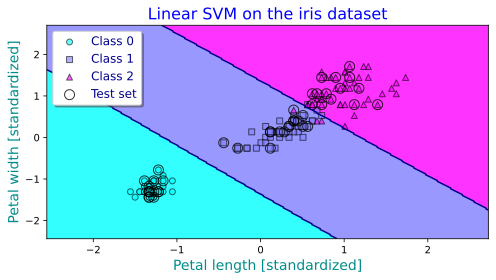

In [19]:
from sklearn.svm import SVC
# SVC (for Support Vector Classification) is a subclass of 'svm' (the whole class' name is
# 'sklearn.svm.SVC')
# by default, 'SVC' uses the OvA method to deal with multiple classes
# as before C, a float with default=1.0, is a regularization parameter which is inversely proportional
# to the strength of the regularization
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("Linear SVM on the iris dataset", fontsize=16, color='blue')
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$<font color='purple'>
        Sometimes we believe that the two classes of a data set should be separated by a polynomial function of a certain degree (for example by looking at the disposition of the data points on a $2d$ or $3d$ diagram). We can then use similar ideas as in our part 2 (subchapter "2f. Polynomial regression") to separate the two classes : add to the training matrix the columns corresponding to the monomials of the polynomial function, and then use a linear method (eg a linear SVM) to separate the data points.</font><br>$\quad$
        For example the following diagram (from the book, wrongly illustrating the polynomial SVM method) represents two classes of data points, which seem to be grouped in two separated rings, one inside the other. Obviously, they are not separable with a hyperplane, but if we add a column corresponding to the (square of the) distances from a point to the center of the rings (here $0$), then they will be. So the map $\phi$ on the diagram is defined by $\;\phi(x_1,x_2) = (x_1,x_2,x_{1}^{2} + x_{2}^{2})\,$, and we would add the column $\;(X_1)^2 + (X_2)^2\;$ to the training matrix and use a linear method to separate the training points.

<figure style="text-align: center;">
    <img src="3.4. Composition of a polynomial and a linear classification method.png" alt="Diagram showing two classes of data points, disposed along rings, one inside the other; then the addition of a dimension corresponding to the square of the distances from the points to the center of the rings; we obtain a 3d figure where the points can now be separated by a hyperplane; if we go back to the original plane, the hyperplane is transformed into a circle separating both classes" width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Composition of a polynomial and a linear classification method</figcaption>
</figure>

<br><br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Let's apply this method to classify the "make_moons" dataset, presented in "Hands-On Machine Learning" by A. Géron. First let's plot its points :

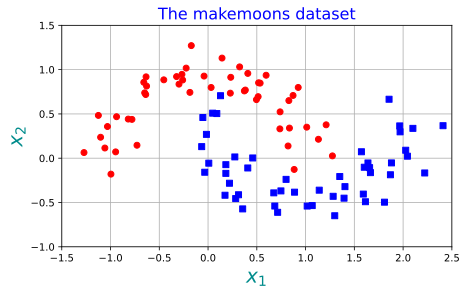

In [20]:
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X_moons[:, 0][y_moons==0], X_moons[:, 1][y_moons==0], "ro")
    plt.plot(X_moons[:, 0][y_moons==1], X_moons[:, 1][y_moons==1], "bs")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$", fontsize=20, color='darkcyan')
    plt.ylabel("$x_2$", fontsize=20, rotation=90, color='darkcyan')

plt.figure(figsize=(7, 4))
plt.title("The makemoons dataset", fontsize=16, color='blue')
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        It seems that the points could be separated by a polynomial function of degree $3$. So the first step is to use '<font color='green'>PolynomialFeatures(degree=3)</font>', which adds all the columns that can be built from powers of all the initial columns of the training matrix up to the degree 3, then use '<font color='green'>StandardScaler()</font>' in order to prepare the data by standardizing it, and at last use a linear classification model of our choice (here '<font color='green'>LinearSVC()</font>' is used).<br>
    We can use '<font color='green'>Pipeline()</font>' to chain transformations before using our estimator :

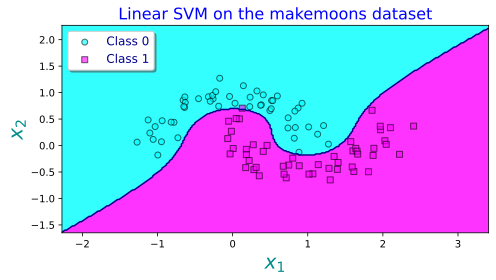

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

# define and train the classifier
poly_lsvm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=30, max_iter=10000, dual='auto', random_state=42))])
poly_lsvm_clf.fit(X_moons, y_moons)

plt.figure(figsize=(7, 4))
plt.title("Linear SVM on the makemoons dataset", fontsize=16, color='blue')
# 'plot_decision_regions' is defined cell 8
plot_decision_regions(X_moons, y_moons, classifier=poly_lsvm_clf)
plt.xlabel("$x_1$", fontsize=20, color='darkcyan')
plt.ylabel("$x_2$", fontsize=20, rotation=90, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3d. Positive definite kernels and RKHS</font><a id="3d"></a></p>$\quad$
        Let $\Omega$ be a subset of $\mathbb{R}^d$ (with $d \in \mathbb{N}^*$). A function $K: \Omega \times \Omega \to \mathbb{R}\:$ is said to be a positive definite kernel iff it is symmetric (ie <font color='purple'>$\: \forall x,y \in \Omega \;\; K(x,y) = K(y,x)$</font>), and satisfies<font color='purple'>
    $$\forall n \in \mathbb{N}^* \quad \forall x_1,\cdots,x_n \in \Omega \quad \forall c_1,\cdots,c_n \in \mathbb{R} \qquad \sum_{i,j=1}^n c_i.c_j.K(x_i,x_j) \geq 0 \qquad (46)$$
    with equality iff $\;\;\forall y \in \Omega \;\; \sum_{i=1}^n c_i.K(x_i,y) \;=\; 0$

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<span style="margin-right: 5px; vertical-align: center; font-size: 14px; color: purple;">■</span><font color='darkpink'>Some constructions of positive definite kernels</font>$\quad$
1. if $K$ is a positive definite kernel then $\: \forall r \in \mathbb{R}_+ \quad (K\!+\!r) \,$ and $\, (r.K) \,$ are positive definite kernels.<br>$\quad$
2. if $\: K_1,\cdots,K_n$ are positive definite kernels then $\: \forall \lambda_1,\cdots,\lambda_n \geq 0 \quad \sum_{i=1}^n \lambda_i.K_i \;$ is a positive definite kernel.<br>$\quad$
3. if $\: K_1,\cdots,K_n$ are positive definite kernels then $\: \forall p_1,\cdots,p_n \in \mathbb{N} \quad \prod_{i=1}^n K_i^{p_i}$ is a positive definite kernel.<br>$\quad$
4. if $\, (K_n)_{n \in \mathbb{N}}$ is a sequence of continuous positive definite kernels and its limit in $C^0([a,b];\mathbb{R})$ exists, then it is a continuous positive definite kernel.<br>$\quad$
5. As a consequence of 2-4, if $K$ is a continuous positive definite kernel and $P$ is a polynomial from $\mathbb{R}$ to $\mathbb{R}$, then $\,P(K)\,$ and $\,\exp(K)\,$ are continuous positive definite kernels.</p>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<span style="margin: 0 .5rem 2rem 0; vertical-align: center; color: purple;">■</span><font color='darkpink'>Examples of positive definite kernels</font><br>$\quad$
        Using the definition and the basic construction properties, it is easy to prove 1-3 and 5 below:$\quad$
1. <font color='magenta'><strong>Linear kernel :</strong></font> $\: \forall x,y \in \mathbb{R}^d \quad K(x,y) = (x,y) \;$ is a positive definite kernel.<br>$\quad$
2. <font color='magenta'><strong>Polynomial kernel :</strong></font> $\: \forall x,y \in \mathbb{R}^d \;\; \forall \gamma>0 \;\; \forall r\geq0 \;\; \forall n \in \mathbb{N} \quad K(x,y) = \left( \gamma.(x,y) + r \right)^n \;$ is a positive definite kernel.<br>$\quad$
3. <font color='magenta'><strong>Gaussian kernel (RBF) :</strong></font> $\: \forall x,y \in \mathbb{R}^d \;\; \forall \gamma>0 \quad K(x,y) = \exp\left( -\gamma . \lVert x-y \rVert^2 \right) \;$ is a positive definite kernel<br>$\quad$
4. <font color='magenta'><strong>Laplacian kernel :</strong></font> $\: \forall x,y \in \mathbb{R}^d \;\; \forall \alpha>0 \quad K(x,y) = \exp\left(-\alpha.\lVert x-y \rVert\right) \;$ is a positive definite kernel.<br>$\quad$
5. <font color='magenta'><strong>inner product kernel :</strong></font> if $\,H\,$ is a $\mathbb{R}$-Hilbert space and $\: \exists \Phi \in C^0([a,b];H) \,$ such that $\: \forall x,y \in [a,b] \quad K(x,y) = (\Phi(x),\Phi(y)) \:$ then K is a positive definite kernel.<br>$\quad$
6. <font color = magenta><strong>"Sigmoid kernel" :</strong></font> $\: \forall x,y \in \mathbb{R}^d \;\; \forall \gamma>0 \;\; \forall r\geq0 \quad K(x,y) = \tanh \left( \gamma.(x,y) + r \right) \;$ is not a positive definite kernel but is often used as such.

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<span style="margin: 0 .5rem 2rem 0; vertical-align: center; color: purple;">■</span><font color='darkpink'>Reproducing Kernel Hilbert Space (RKHS)</font><br>$\quad$
    A Hilbert space $H$ of functions from a subset $\Omega$ of $\mathbb{R}^d$ onto $\mathbb{R}$ is said to be a Reproducing Kernel Hilbert Space (RKHS) iff<br><font color='purple'>
    $$\forall x \in \Omega \quad L_x: h \in H \mapsto h(x) \in \mathbb{R} \qquad (47)$$</font>
is continuous; or, equivalently (since a $\mathbb{R}$-Hilbert space is isomoprhic to its dual according to the Riesz representation theorem)<br><font color='purple'>
    $$\forall x \in \Omega \quad \exists K_x \in H \quad \forall h \in H \;\;\quad \left(K_x,h\right) \;=\; h(x) \qquad (48)$$</font>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<span style="margin: 0 .5rem 2rem 0; vertical-align: center; color: purple;">■</span><font color='darkpink'>Reproducing kernel of a RKHS</font><br>$\quad$
    If $H$ is a RKHS over a subset $\Omega$ of $\mathbb{R}^d$ then<br><font color='darkpink'>
    $$K: \left(x,y\right) \in \Omega \times \Omega \mapsto K(x,y) \;=\; \left(K_x, K_y\right) \qquad (49)$$</font>
is uniquely defined (since $L_x$ and $L_y$ are uniquely defined, and so are $K_x$ and $K_y$), and is a positive definite kernel over $\Omega$, called the "<font color='purple'>reproducing kernel of $H$</font>".

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
<span style="margin: 0 .5rem 2rem 0; vertical-align: center; color: purple;">■</span><font color='darkpink'>The Moore-Aronszajn theorem<font color='purple'><br>$\quad$
    If $K$ is a positive definite kernel over a subset $\Omega$ of $\mathbb{R}^d$ then there is a unique RKHS $H$ over $\Omega$ whose reproducing kernel is $K$. Moreover the map $\; \phi:x \in \Omega \mapsto K(x,.) \in H \;$ satisfies<br><font color='darkpink'>
    $$\forall x,y \in \Omega \quad \left(\phi(x) \,,\phi(y)\right) \,=\, K(x,y) \qquad (50)$$</font>
proof : see { https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space } for a perfect demonstration

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3e. Solving nonlinear problems using a kernel SVM</font><a id="3e"></a></p>$\quad$
        Positive definite kernels offer us a new set of prediction methods. Indeed, consider any positive definite kernel $K$ defined over $\mathbb{R}^n$, and consider the optimization problem:<font color='darkpink'>    
    $$\begin{cases} \text{minimize}_{w,b,\zeta} \;\; & \frac{1}{2} \lVert w \rVert^2 + C\times\sum_{i=1}^m \zeta_i \\\\ \text{ subject to } & \forall \, i = 1,\cdots,m \quad y^{(i)}.\left(w.\phi(x^{(i)})+b\right) \geq 1 - \zeta_i \\ \qquad \text{ and } & \forall \, i = 1,\cdots,m \quad \zeta_i \geq 0 \end{cases} \, \qquad (51)$$</font><br>
where $\phi$ is the function associated with $K$ in the Moore-Aronszajn theorem.<br>$\quad$
    Here, the weight vector is not in $\mathbb{R}^n$ but in the RKHS $H$ associated with $K$. The idea is to send the instances into the high (typically infinite) dimensional Hilbert space $H$ to try and capture their relationships there. While the strategy consists of not computing neither $H$, $\phi$, $w$ nor anything about the RKHS. This is possible because we already know how to solve $(51)$ and the final solution does not involve these objects; the end result is that we can still make predictions, even without computing the weight vector.<br><br>$\quad$
        The problem $(51)$ is similar to our soft-margin problem $(42)$ but with $\phi(x^{(i)})$ instead of $x^{(i)}$, so the first step is to solve the optimization problem (akin to $(45)$)<br><font color='purple'>
        $$\begin{cases} \text{maximize}_{\substack{\lambda}} \;\; & -\frac{1}{2} \sum_{i,j=1}^m y^{(i)} \, y^{(j)} \; K(x^{(i)},x^{(j)}) \; \lambda_i \, \lambda_j \, + \, \sum_{i=1}^m \lambda_i \\\\ \text{ subject to } & \forall i=1,\cdots,m \quad 0 \leq \lambda_i \leq C \quad\text{ and}\quad \sum_{i=1}^m \, y^{(i)} \, \lambda_i = 0 \end{cases} \, \,\qquad (52)$$</font><br>
    where we have replaced $\;\phi(x^{(i)}).\phi(x^{(j)})\;$ with $\;K(x^{(i)},x^{(j)})$.<br>$\quad$
        This is a usual optimization problem in $\mathbb{R}^m$, which is independant of the RKHS. We can solve it as usual, and then we will get our weight vector $\hat{w}$ and bias $\hat{b}$ given by formulae akin to $(43)$ and $(44)$; more precisely, if $\left(\hat{\lambda}_i \right)_{i=1}^m$ is the solution of $(52)$ : <br><font color='darkpink'>
    $$\hat{w} \;=\; \sum_{i=1}^m y^{(i)} \; \hat{\lambda}_i \, \phi(x^{(i)}) \,\qquad (53)$$</font>
    and<font color='darkpink'>
    $$\hat{b} \;=\; \text{mean}\left(\left\{y^{(i)} - \hat{w}.\phi(x^{(i)}),\;\; i \,\text{ such that }\; 0 < \hat{\lambda}_i < C \right\}\right) \,\qquad (54)$$</font><br>
    <font color='magenta'>(recall that, in fact, all the values of the set in $(54)$ are equal, and we are computing the mean only to regularize any potential computation inaccuracy)</font><br>$\quad$
        These depend on the RKHS, but our main interest lies in the predictions rather than in the values of the weight vector and bias. And any instance $x$ will be predicted to be in class $1$ iff $\;\hat{w}.\phi(x) + \hat{b} \geq 0\,$; and, using $(50)$, $(53)$ and $(54)$ this simplifies into<br><font color='darkpink'>
    $$x \, \text{ is in class } 1 \;\;\text{ iff }\;\; y^{(i_0)} \,+\, \sum_{i=1}^m \, y^{(i)} \, \hat{\lambda}_i \left[K(x^{(i)}, x) - K(x^{(i)}, x^{(i_0)})\right] \;\geq\; 0 \,\qquad (55)$$</font><br>
    where $\,i_0\,$ is any index in $\,\{1,\cdots,m\}\,$ such that $\;0<\hat{\lambda}_{i_0} < C$ (under this condition all these quantities are equal to $\;\hat{w}.\phi(x) + \hat{b}\,$).<br>
    Hence our predictions do not depend on anything related to the RKHS.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>3f. Examples of nonlinear kernel SVM</font><a id="3f"></a></p>$\quad$
        Consider the following <font color='darkpink'>XOR dataset</font> :

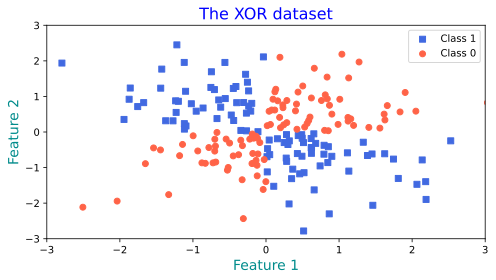

In [22]:
np.random.seed(1)
# X_xor is generated with 200 instances, each having 2 features. The values in this array are random
# samples drawn from a standard normal distribution (mean=0, standard deviation=1).
X_xor = np.random.randn(200, 2)
# y_xor is a 1d array of length 200, and y_xor[n] is False iff X_xor[n,0] and X_xor[n,1] have the
# same value
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
# and now its boolean values are converted, to 1 if True, and to 0 otherwise
y_xor = np.where(y_xor, 1, 0)

plt.figure(figsize=(7, 4))
plt.title("The XOR dataset", fontsize=16, color='blue')
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor == 1, 1], c='royalblue', marker='s', label='Class 1')
plt.scatter(X_xor[y_xor == 0, 0], X_xor[y_xor == 0, 1], c='tomato', marker='o', label='Class 0')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.xlabel("Feature 1", fontsize=14, color='darkcyan')
plt.ylabel("Feature 2", fontsize=14, color='darkcyan')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Clearly the classes of this dataset can not be separated by a hyperplane, not even by first applying a polynomial function : we need a decision boundary in several pieces (here $2$). In such cases the method of choice is the gaussian kernel SVM (called '$\,$<font color='green'>rbf</font>$\,$' for "$\,$<font color='green'>radial basis function</font>$\,$" in <font color='green'>scikit-learn</font>, see "Examples of positive definite kernels" in [3d.](#3d)).

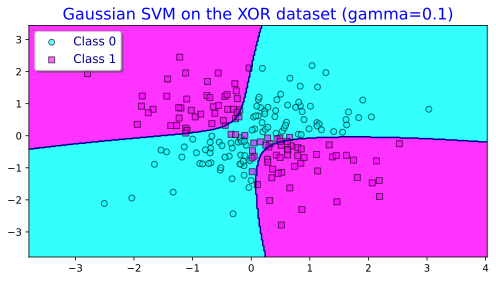

In [23]:
# 'gamma' is the same as in our definition of the gaussian kernel
# as usual scikit-learn does not provide much information about the parameter 'C', except that the
# strength of the regularization is inversely proportional to it
svm = SVC(kernel='rbf', gamma=0.1, C=10, random_state=1)
svm.fit(X_xor, y_xor)

plt.figure(figsize=(7, 4))
plt.title("Gaussian SVM on the XOR dataset (gamma=0.1)", fontsize=16, color='blue')
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        If we increase the parameter 'gamma', we increase the variance and the decision boudary comes closer to the training points; for example if we use 'gamma=10' instead of 'gamma=0.1" then we get :

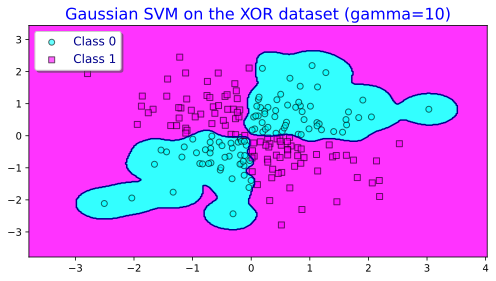

In [24]:
svm = SVC(kernel='rbf', gamma=10, C=10, random_state=1)
svm.fit(X_xor, y_xor)

plt.figure(figsize=(7, 4))
plt.title("Gaussian SVM on the XOR dataset (gamma=10)", fontsize=16, color='blue')
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        We can do the same with our $3$ classes iris dataset. First for 'gamma=0.1' we get something very close to what we obtained with the soft margin linear SVM (see cell 19) :

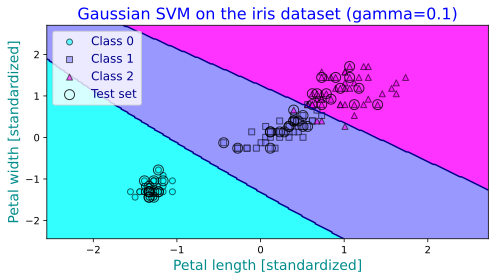

In [25]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(7,4))
plt.title("Gaussian SVM on the iris dataset (gamma=0.1)", fontsize=16, color='blue')
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105, 150))
plt.xlabel("Petal length [standardized]", fontsize=14, color='darkcyan')
plt.ylabel("Petal width [standardized]", fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
    And then for 'gamma=30' :

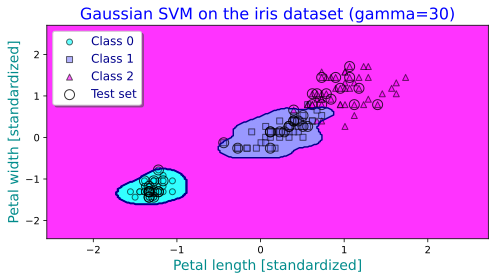

In [26]:
svm = SVC(kernel='rbf', gamma=30, C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("Gaussian SVM on the iris dataset (gamma=30)", fontsize=16, color='blue')
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]', fontsize = 14, color='darkcyan')
plt.ylabel('Petal width [standardized]', fontsize = 14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<a id="4"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>4. DECISION TREES AND RANDOM FORESTS</font></h4>
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4a. What is a decision tree ?</font><a id="4a"></a></p>

<figure style="text-align: center;">
    <img src="3.5. Example of a decision tree.png" alt="Diagram showing an example of a decision tree. The nodes with children correspond to tests to perform, their branches correspond to the various possible outcomes, and the leaves (the nodes without children) are the final decisions. Any final decision correspond to the branches leading from the root of the tree to the leaf -ie the outcomes of the tests performed along the way. This example diagram deals with which activity to choose according to various tests (eg if we do not have work to do, and it's rainy, and our friend is available, then we go to the cinema)." width="500" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">Example of a decision tree</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        A "$\,$<font color='darkpink'>decision tree</font>$\,$" is represented upside-down. It starts at its "$\,$<font color='darkpink'>root</font>$\,$", which implicitly contains all the possibilities, and is further down separated into "$\,$<font color='darkpink'>nodes</font>$\,$", which perform explicit tests, up to its "$\,$<font color='darkpink'>leaves</font>$\,$", which correspond to "$\,$<font color='darkpink'>pure nodes</font>$\,$" where only one possibility exists so no more tests are needed.<br>$\quad$
        We speak of "$\,$<font color='darkpink'>binary decision trees</font>$\,$" when all the tests only have two possible issues, passed or failed. Traditionnally, the "successful" instances will be in the left child node, the others will be in the right child node.<br>$\quad$
        Children nodes are displayed below their parents, with links between the parent and each of its children; such a link is called a "$\,$<font color='darkpink'>branch</font>$\,$". Following branches, we start at "$\,$<font color='darkpink'>depth</font>$\,$" $0$ (the depth of the root), and then all the nodes reached after one test are at depth $1$, and so on, the nodes obtained after $n$ tests are at depth $n$.<br>$\quad$
        In the example displayed in the diagram, the possibilities were described by texts, but they could have been real numbers as well, for example the features of the iris dataset, and a test would be about their values, for example "Is the sepal width ≥ 2.8 ?".<br>$\quad$
        The goal of a decision tree model is to learn a series of questions to infer the class labels of the examples. Some advantages of decision trees over other machine learning models is that they can handle both numerical and categorical data, and they are easy to read and interpret. Moreover, for binary decision trees, if the children are about half the size of their parents, then the decision tree contains at most  $\,\log_2(m)\,$ depths, hence a decision tree is relatively cheap to use. But they are expensive to train : for a training matrix containing $m$ instances and $n$ features, the computational complexity is $\: O(m\ln(m) \times n) \,$. Consequently, when there are many instances and features it is necessary to restrict the number of features, and to use random sub-samples instead of the whole samples (at least for the first nodes). But decision trees are very sensitive to outliers, and thus to the choice of samples and features... We will mitigate this instability by first not going too deep into a decision tree, ie we will "$\,$<font color='darkpink'>prune</font>$\,$" the tree by setting a limit for its maximum depth, and by combining multiple decision trees inside ensemble methods, notably inside random forests.<br>
<p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p> $\quad$
    Following the book, here I will only speak about decision trees for classification tasks; for a more complete survey of decision trees (including "Decision trees for regression tasks" - ie predictions of values - and "Sensitivity to hyperparameters and instability") see "Hands-on machine learning", part "Decision trees", by A. Géron.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4b. Building a decision tree</font><a id="4b"></a></p>$\quad$
        The strategy followed to train a decision tree is to start at the root and split the data on the feature that results in the largest "$\,$<font color='darkpink'>information gain</font>$\,$", denoted by "$\,$<font color='darkpink'>$IG$</font>$\,$" here (see next paragraph), then repeat this splitting procedure at each node until reaching the leaves (ie the pure nodes), or until reaching the chosen maximum depth.<br>$\quad$
        The information gain between a parent and its (potential) children depends on the cardinality $N_p$ of the set of examples inside the parent dataset $D_p$, on the cardinalities $N_j$ of the children datasets $D_j$ and on an "$\,$<font color='darkpink'>impurity measure</font>$\,$", "$\,$<font color='darkpink'>$I$</font>$\,$", which is a function over all possible datasets. More precisely, if <font color='purple'>$ch$</font> is the number of children,<br><font color='darkpink'>
    $$IG(D_p) \;=\; I(D_p) \,-\, \sum_{j=1}^{ch} \, \frac{N_j}{N_p} I(D_j) \;=\; \frac{1}{N_p} \, \sum_{j=1}^{ch} \, N_j \,. \left(I(D_p) - I(D_j) \right) \,\qquad (56)$$</font>
    so $IG(D_p)$ is the weighted mean between the impurity of the parent and the impurity of its children.<br>$\quad$
        In practice, we will only use binary decision trees, so $(56)$ becomes<br><font color='darkpink'>
    $$IG(D_p) \;=\; I(D_p) \,-\, \frac{N_{left}}{N_p} I(D_{left}) \,-\, \frac{N_{right}}{N_p} I(D_{right}) \,\qquad (57)$$</font><br>$\quad$
        There are three impurity measures that are commonly used with binary decision trees. Given a dataset $D$, they depend on the proportions of each class inside $D$. Let's denote by $cl$ the number of classes and by $p_1, \cdots, p_{cl}$ their relative proportions, these impurity measures are :<br>
* the "$\,$<font color='darkpink'>Gini impurity</font>$\,$" :<br><font color='darkpink'>
        $$I_G(D) \;=\; 1 \,-\, \sum_{i=1}^{cl} \, p_i^2 \;=\; \sum_{i=1}^{cl} \, p_i \left(1 - p_i \right) \,\qquad (58)$$</font><br>
* the "$\,$<font color='darkpink'>entropy</font>$\,$" :<br><font color='darkpink'>
        $$I_H(D) \;=\; - \, \sum_{i=1}^{cl} \, p_i \, \log_2\left(p_i\right) \,\qquad (59)$$</font><br>
* the "$\,$<font color='darkpink'>classification error</font>$\,$" :<br><font color='darkpink'>
        $$I_E(D) \;=\; 1 \,-\, \max_{\substack{i=1,\cdots, cl}}\; p_i \,\qquad (60)$$</font><br>
        Note that if a node is pure there is one $p_i$ with value $1$, the others are $0$, and all three impurity measures have a value of $0$.<br><br>$\quad$
        When there are only two classes (binary classification) these expressions become :<br>
* the <font color='purple'>Gini impurity for binary classification</font> :<br><font color='purple'>
        $$I_G(D) \;=\; 2 \, p \left(1 - p \right) \,\qquad (61)$$</font><br>
* the <font color='purple'>entropy for binary classification</font> :<br><font color='purple'>
        $$I_H(D) \;=\; - \, p \, \log_2(p) \,-\, (1-p) \, \log_2(1-p) \,\qquad (62)$$</font><br>
* the <font color='purple'>classification error for binary classification</font> :<br><font color='purple'>
        $$I_E(D) \;=\; 1 \,-\, \max\{p, 1-p\} \,\qquad (63)$$</font><br><br>$\quad$
        Let's represent them, together with a scaled version of the entropy (half of it) to observe that the Gini impurity is an intermediate measure between the entropy and the classification error :

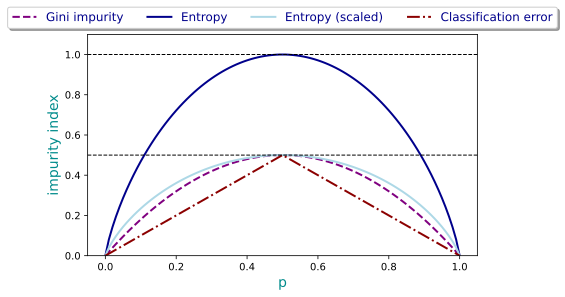

In [27]:
def gini(p):
    return 2*p*(1 - p)

def entropy(p):
    if p == 0 or p == 1: return 0
    else: return - p * np.log2(p) - (1 - p) * np.log2(1 - p)

def error(p):
    return 1 - np.max([p, 1 - p])

# generate an array of values from 0.0 to 1.0 (included) with a step of 0.01
x = np.arange(0., 1.01, 0.01)
gini = [gini(i) for i in x]
ent = [entropy(p) if p != 0 else 0 for p in x]
sc_ent = [.5*e for e in ent]
err = [error(i) for i in x]

# create a new figure
plt.figure(figsize=(7, 4))
# create a subplot within the figure
ax = plt.subplot(111)
# 'zip' unites the 4 1d arrays into a 2d array, and then the loop contains only 4 rounds of plotting,
# the first with the values i=gini, lab='Gini impurity', ls='--' and c='purple' and the last with
# i=err, lab='Classification error', ls='-.' and c='darkred'
for i, lab, ls, c in zip([gini, ent, sc_ent, err],
                          ['Gini impurity', 'Entropy', 'Entropy (scaled)', 'Classification error'],
                          ['--', '-', '-', '-.'],
                          ['purple', 'darkblue', 'lightblue', 'darkred']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
#* loc='upper center' : places the legend at the upper center of the plot
#* bbox_to_anchor=(0.5, 1.15) : sets the center of the legend box to be at (0.5, 1.15) in the
# coordinates system of the figure
#* ncol=4 : specifies the number of columns in the legend box
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
# adds a horizontal black dashed line of width 1 at y=0.5 and y=1
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p', fontsize = 14, color='darkcyan')
plt.ylabel('impurity index', fontsize = 14, color='darkcyan')
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The classification error impurity measure is not recommended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes than the other two impurity measures. Moreover, in practice, both the Gini impurity and entropy typically yield very similar results, and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs, so the simpler Gini impurity will be favored.

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4c. Example of a decision tree</font><a id="4c"></a></p>$\quad$
        Standard decision trees, like the decision trees used in <font color='green'>scikit-learn</font>, are binary trees. And they do not consider all possible splits of the parent's instances, as this would be computationally too demanding (plus the more complex the trees, the greater the risk of overfitting). Instead, the only possible splits are the ones done according to a hyperplane perpendicular to one of the features (and separating the parent's instances into two non-empty groups). More precisely, the split is done according to the "best" hyperplane in the set $\mathcal{H}$ of hyperplanes defined by a single feature and a threshold.<br>$\quad$
        This is how $\mathcal{H}$ is built : for $j=1,\cdots,n$ collect and sort the feature values $x^{(i)}_j$ of the instances in the node; say we get $a^{(1)}_j < a^{(2)}_j < \cdots < a^{(p_j)}_j$ where $p_j$ depends on the instances in the node. And then, compute their contiguous means, which will be our thresholds : $\;h^{(k)}_j = \frac{a^{(k)}_j + a^{(k+1)}_j)}{2}\;$ for $\;k=1,\cdots, p_j\!-\!1$. We get $(p_j\!-\!1)$ splitting hyperplanes along the $j$-th axis : $\mathcal{H}^{(k)}_j = \Big\{x \in \mathbb{R}^n \:;\;\; x_j = h^{(k)}_j \Big\}$ for $\;k=1,\cdots, p_j\!-\!1$. We do this for all $j=1,\cdots,n$, and $\mathcal{H}$ is our collection of axis-aligned hyperplanes, $\mathcal{H} = \Big\{\mathcal{H}^{(k)}_j \:;\;\; j=1,\cdots,n \;\text{ and }\; k=1,\cdots, p_j \Big\}$. Any hyperplane $H$ of $\mathcal{H}$ naturally splits the instances in the node into two groups, the instances on one side of $H$, and the instances on the other side.<br>
    The "best" hyperplane among the hyperplanes in $\mathcal{H}$ is the hyperplane which minimizes the chosen impurity measure : compute the proportion $p$ of instances of class 0 in the parent node, and in each children for all the potential splits; from there compute all potential impurities; and choose the split which yields the lowest impurity.<br><br>$\quad$
        In the following, we will only consider standard decision trees. (Standard) decision trees can build complex decision boundaries by dividing the feature space into rectangles. However, we have to be careful since the deeper the decision tree, the more complex the decision boundary becomes, which can easily result in overfitting (even when only considering standard decision trees). Using <font color='green'>scikit-learn</font>'s <font color='green'>DecisionTreeClassifier</font>, we will now train a decision tree with a maximum depth of 4, using the Gini impurity as a criterion for impurity. After executing the code example, we obtain the typical axis-parallel decision boundaries of the decision trees.<br><br>
    <p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Notes :</font></p>$\quad$
        * instead of stopping the growing of the tree at a certain depth we can stop it until all its nodes are either pure or contain less than a chosen number of samples, called $\,$<font color='green'>min_samples_split</font>$\,$ in <font color='green'>scikit-learn</font><br>$\quad$
        * although feature scaling may be desired for visualization purposes, it is of little use for training decision trees since they only deal with proportions, not values.

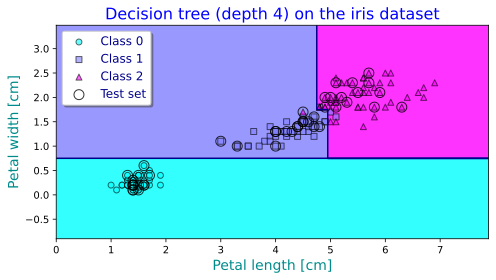

In [28]:
from sklearn.tree import DecisionTreeClassifier
# 'criterion' can be "gini" (the default value), "entropy", or "log-loss" - not presented here -
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(7, 4))
plt.title("Decision tree (depth 4) on the iris dataset", fontsize=16, color='blue')
# 'plot_decision_regions' has been defined cell 8
plot_decision_regions(X_combined, y_combined, classifier=tree_model, test_idx=range(105, 150))
plt.xlabel('Petal length [cm]', fontsize=14, color='darkcyan')
plt.ylabel('Petal width [cm]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        Using $\,$<font color='green'>tree.plot_tree</font>$\,$ from <font color='green'>scikit-learn</font>, we can draw a decision tree after training :

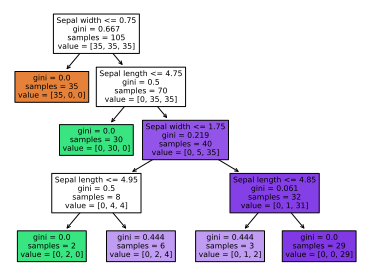

In [29]:
from sklearn import tree
feature_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width']
#* 'tree_model' is the name of our decision tree (previous cell)
#* 'filled=True' colors the nodes with the color which represents the majority class in that
# particular node and the color gradient represents the distribution of classes in the node
tree.plot_tree(tree_model, feature_names=feature_names, filled=True)
plt.show()

<br><br><div style="font-family: Arial; font-size: 14px; color: darkblue">
    <p style="margin: 0 0 .5rem 4rem; font-size: 16px; font-weight: 600"><font color='darkpink'>4d. Random forests</font><a id="4d"></a></p>$\quad$
        Consider a binary classification task, with many predictors; even if individually they are not great, say they only have a $51\%$ accuracy, if we train enough of them and average their results we will get as good an accuracy as needed, according to the law of large numbers. The same is true if there are more than two classes. This is the idea behind "$\,$<font color='darkpink'>random forests</font>$\,$" : instead of training one single decision tree perfectly (and risk overfitting with too closely fitted decision boundaries), grow several hundreds of small trees using less features than the original one and average their results.<br>$\quad$
        Now, let's explain how we can grow many trees from a single training dataset and aggregate their results.<br>
    <font color='purple'>1. Draw a sample :</font> typically a small decision tree will contain as many instances as the original one, ie $m$. In general we do not take all the instances of the training matrix, though this is an option called the "$\,$<font color='darkpink'>pasting method</font>$\,$"; instead we randomly choose $m$ instances with replacement (ie randomly choose one and replace it; do this $m$ times), this option being called the "$\,$<font color='darkpink'>bagging method</font>$\,$" from "$\,$<font color='darkpink'>bootstrap (aggregating)</font>$\,$" ("$\,$<font color='darkpink'>bootstrap</font>$\,$" being the technique of sampling with replacement). Note that, since the instances have been chosen with replacement, some are present multiple times, while others are not present. When we choose $m$ instances for a subset each instance has a chance of $\left(\frac{m-1}{m}\right)^m$ to not be present in the final subset ; $\left(\frac{m-1}{m}\right)^m$ grows with $m$ and converges to $e^{-1}$ ($\simeq 36.8\%$) ; for example for $m\!=\!100\,$ the probability that an instance will not be chosen in a subset is already $36.6\%$. '$\,$<font color='green'>bootstrap=True</font>$\,$' is the default on <font color='green'>scikit-learn</font>; and the default number of instances for each small tree is '$\,$<font color='green'>max_samples=None</font>$\,$', ie $m$.<br>
    <font color='purple'>2. grow a decision tree from the sample but, at each node, only use $d$ features, randomly chosen</font> (without replacement) and, as usual, split the node using the feature that provides the best split according to the information gain. Usually we use $\, d = \sqrt n \,$ features, although it is possible to choose the $\log_2$, or the same number of features than the original number. '$\,$<font color='green'>max_features="sqrt"</font>$\,$' is the default on <font color='green'>scikit-learn</font>; and the default impurity measure is '$\,$<font color='green'>criterion="gini"</font>$\,$'.<br>
    <font color='purple'>3. Grow a sufficient number of these small trees</font>. By default '$\,$<font color='green'>n_estimators=100</font>$\,$' on <font color='green'>scikit-learn</font>.<br>
    <font color='purple'>4. The predicted class for any instance will then be the class which receives the most votes</font> by our set of predictors.<br>$\quad$
        Although random forests don’t offer the same level of interpretability as decision trees, a big advantage of random forests is that we don’t have to worry much about choosing good hyperparameters' values. We typically don’t need to prune the random forest since the ensemble model is quite robust to noise from averaging the predictions among the individual decision trees. The only parameter that we
need to care about in practice is the number of trees that we choose for the random forest.

<div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        The book proposes one example of random forest, based on the growing of 25 decision trees for the iris dataset.<br>$\quad$
    Then I add an example based on 300 instances from the '<font color='green'>make_moons</font>' dataset to show the difference of accuracy between a perfect decision tree, grown with '<font color='green'>min_samples_split=2</font>', and $100$ small trees, grown with '<font color='green'>max_depth=3</font>': <font color='purple'>the random forest is better both in accuracy scores and in the smoothness of the decision boundaries</font>.<br><br>
<p style="margin: 0 0 0 2rem; font-size: 15px; font-weight: 600"><font color='purple'>$\quad$Note :</font></p>$\quad$
        The accuracy score for the random forest composed of $100$ trees of depth $3$ is $88.9\%$; if we use a random forest composed of $2000$ trees of depth $6$ the accuracy score does not improve much, with $90\%$ of correct predictions. A simple Gaussian SVM like 'SVC(kernel='rbf', gamma=1, C=20, random_state=42)' yields $92.2\%$ of correct predictions on its own (see below) while being much less demanding than the larger random forest.

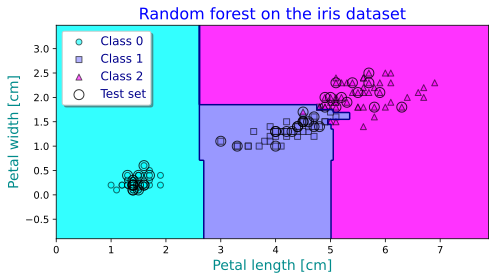

In [30]:
from sklearn.ensemble import RandomForestClassifier
# 'n_jobs' specifies the number of processor cores to use for this computation
forest = RandomForestClassifier(n_estimators=25, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)

plt.figure(figsize=(7,4))
plt.title("Random forest on the iris dataset", fontsize=16, color='blue')
# plot_decision_regions was defined cell 8
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('Petal length [cm]', fontsize=14, color='darkcyan')
plt.ylabel('Petal width [cm]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><span style="margin-right: 5px; vertical-align: center; font-size: 14px; color: purple;">■</span><font color='darkpink'>Comparison between a single perfect decision tree and a simple random forest :<br>

Test accuracy_score for the fully grown tree :  0.8555555555555555
Test accuracy_score for the random forest :  0.8888888888888888 



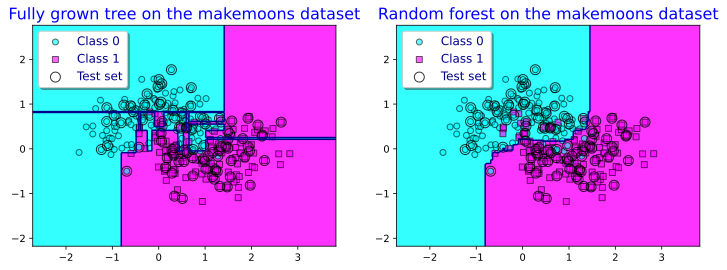

In [31]:
# 'noise' specifies the standard deviation of Gaussian noise added to the data
Xm, ym = make_moons(n_samples=300, noise=0.30, random_state=42)
# shuffles the instances before splitting, using 70% of them for training
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, train_size=.7, random_state=42)

# define and train the predictors
from sklearn.tree import DecisionTreeClassifier
# first, a single decision tree
tree_clf = DecisionTreeClassifier(min_samples_split=2, random_state=42)
tree_clf.fit(Xm_train, ym_train)
ym_pred_tree = tree_clf.predict(Xm_test)
# second, a set of 100 decision trees
bag_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42, n_jobs=2)
bag_clf.fit(Xm_train, ym_train)
ym_pred_forest = bag_clf.predict(Xm_test)

# print the test accuracy_score for both the single tree and the random forest
print(BB + "Test accuracy_score for the fully grown tree : " + MB, accuracy_score(ym_test, ym_pred_tree))
print(BB + "Test accuracy_score for the random forest : " + MB, accuracy_score(ym_test, ym_pred_forest), "\n")

Xm_combined = np.vstack((Xm_train, Xm_test))
ym_combined = np.hstack((ym_train, ym_test))

# we draw the graphs
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].set_title("Fully grown tree on the makemoons dataset", fontsize=16, color='blue')
# 'plot_decision_regions' has been defined cell 8
plt.sca(ax[0])
plot_decision_regions(Xm_combined, ym_combined, classifier=tree_clf, test_idx=range(210, 300))
ax[0].legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')

ax[1].set_title("Random forest on the makemoons dataset", fontsize=16, color='blue')
plt.sca(ax[1])
plot_decision_regions(Xm_combined, ym_combined, classifier=bag_clf, test_idx=range(210, 300))
ax[1].legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<br><br><span style="margin-right: 5px; vertical-align: center; font-size: 14px; color: purple;">■</span><font color='darkpink'>Accuracy score and decision boundary of a Gaussian SVM :<br>

accuracy_score for the Gaussian SVM :  0.9222222222222223


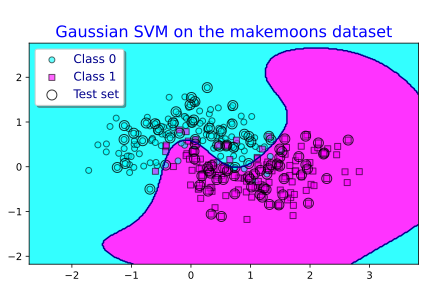

In [32]:
svm = SVC(kernel='rbf', gamma=1, C=20, random_state=42)
svm.fit(Xm_train, ym_train)
ym_pred_svm = svm.predict(Xm_test)
print(BB + "accuracy_score for the Gaussian SVM : " + MB, accuracy_score(ym_test, ym_pred_svm))

plt.figure(figsize=(7, 4))
plt.title("\nGaussian SVM on the makemoons dataset", fontsize=16, color='blue')
plot_decision_regions(Xm_combined, ym_combined, classifier=svm, test_idx=range(210, 300))
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()

<a id="Appendix"></a><br><br><br><div style="font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">
    <h4 style="margin: 0 0 .5rem 2rem; font-size: 18px; font-weight: 800"><font color='darkpink'>APPENDIX - K-NEAREST NEIGHBORS</font></h4>$\quad$
        The <font color='darkpink'>knn algorithm</font> is fairly straightforward and can be summarized by the following steps:<br></font><font color='purple'>
    1. Choose the number k of neighbors to be considered and a distance metric</font>. On <font color='green'>scikit-learn</font> the default value for k is '$\,$<font color='green'>k=5</font>$\,$'. The metric is usually an $l^p$ distance; for example the distance between the instance $x$ to be classified and another instance $z$ would be</font><br><font color='darkpink'>
    $$\left\lVert z-x \right\rVert_p \;=\; \left(\sum_{i=1}^n \left(z^{(i)} - x^{(i)}\right)^p \right)^{\frac{1}{p}} \,\qquad (64)$$</font>$\quad$
    Often it is the euclidean distance ($p=2$); for example the default on <font color='green'>scikit-learn</font> is '$\,$<font color='green'>p=2</font>$\,$'.<br><font color='purple'>
    2. Find in the dataset the k nearest neighbors of the instance that we want to classify</font>. The computational complexity for classifying new examples grows linearly with the number of examples in the dataset. Moreover large datasets can also be problematic in terms of limited storage capacities. However the computational cost is manageable as long as we are working with relatively small to medium-sized datasets, in which case knn algorithms provide good predictive results. They are indeed a good choice for approaching many real-world problems. Recent examples of using k-nearest neighbor methods include predicting properties of pharmaceutical drug
targets and state-of-the-art language models.<br>
    <font color='purple'>3. Assign the class label by majority vote</font> (see diagram below). When there is a tie <font color='green'>scikit-learn</font> will attribute the label of the nearest neighbor, and if there is still a tie then the algorithm will choose the class label that comes first in the dataset.

<figure style="text-align: center;">
    <img src="3.6. The knn strategy.png" alt="Diagram showing a point whose label is yet to be predicted, and its 5 nearest neighbors : 3 triangles, 1 plus and 1 circle; since there are more triangles the point is predicted to be a triangle as well." width="350" />
    <figcaption style="margin-top: .5rem; font-weight: bold; color: purple">The knn strategy</figcaption>
</figure>

<br><div style="margin: 0; font-family: Arial; font-size: 14px; font-weight: 500; color: darkblue">$\quad$
        As illustration, the book applies <font color='green'>scikit-learn</font>'s knn algorithm <font color='green'>KNeighborsClassifier</font> to the iris dataset.<br>$\quad$
        Then, I once again use my 300 instances from the 'make_moons' dataset to compare the knn accuracy score and decision boundary smoothness with those of my perfect decision tree, random forest, and Gaussian SVM seen earlier. The knn achieves similar results to the Gaussian SVM, but it requires more time; both methods yield the best results here.

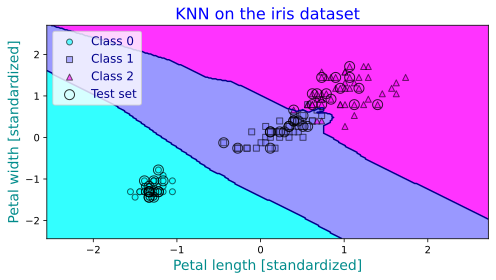

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2)
knn.fit(X_train_std, y_train)

plt.figure(figsize=(7, 4))
plt.title("KNN on the iris dataset", fontsize=16, color='blue')
plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('Petal length [standardized]', fontsize=14, color='darkcyan')
plt.ylabel('Petal width [standardized]', fontsize=14, color='darkcyan')
plt.legend(loc='upper left', fontsize=12, labelcolor='darkblue')
plt.tight_layout()
plt.show()

<br><br><span style="margin-right: 5px; vertical-align: center; font-size: 14px; color: purple;">■</span><font color='darkpink'>Accuracy score and decision boundary of a knn :<br>

accuracy_score for the knn :  0.9222222222222223


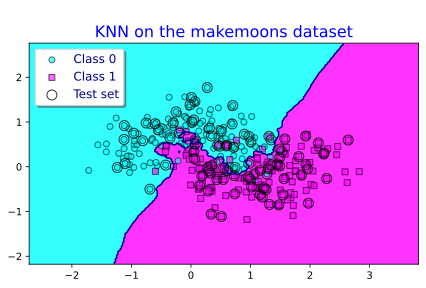

In [34]:
knn.fit(Xm_train, ym_train)
ym_pred_knn = knn.predict(Xm_test)
print(BB + "accuracy_score for the knn : " + MB, accuracy_score(ym_test, ym_pred_knn))

plt.figure(figsize=(7, 4))
plt.title("\nKNN on the makemoons dataset", fontsize=16, color='blue')
plot_decision_regions(Xm_combined, ym_combined, classifier=knn, test_idx=range(210, 300))
plt.legend(loc='upper left', fancybox=True, shadow=True, fontsize=12, labelcolor='darkblue')
plt.show()